In [ ]:
# General
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

# Tensorflow
import tensorflow as tf

# Pics processing
from PIL import Image

# Pickles
from six.moves import cPickle as pickle

from sklearn.cross_validation import train_test_split





In [2]:
os.getcwd()

'/home/ubuntu/Homework 4'

In [3]:
# as fow now, let's set to the path to the train folder
#os.chdir('C:\\Users\\oleg.smolanko\\Desktop\\11_HARVARD\\03_Machine_Learning_And_AI\\Week 8\\Homework 4\\train')
os.chdir('/home/ubuntu/Homework 4/train')

In [4]:
# check number if picutres in the training folder
len(os.listdir())

10222

In [5]:
# check the name of the first picture in the folder
os.listdir()[0]

'377c941b6884717dfb825cfe1a11856a.jpg'

In [6]:
pixel_dict = {}

for i in range(len(os.listdir())):
    jpgfile = Image.open(os.listdir()[i])
    if jpgfile.size in pixel_dict.keys():
        pixel_dict[jpgfile.size] += 1
    else:
        pixel_dict[jpgfile.size] = 1

pixel_dict

{(500, 375): 2647,
 (400, 344): 3,
 (500, 500): 67,
 (500, 470): 2,
 (231, 227): 1,
 (474, 500): 4,
 (500, 332): 153,
 (375, 500): 615,
 (402, 343): 1,
 (500, 299): 3,
 (250, 223): 5,
 (200, 192): 4,
 (374, 212): 1,
 (333, 500): 363,
 (160, 160): 2,
 (390, 320): 1,
 (400, 346): 2,
 (291, 210): 1,
 (200, 280): 6,
 (500, 333): 1033,
 (300, 257): 2,
 (450, 338): 7,
 (443, 500): 4,
 (594, 407): 1,
 (1600, 1200): 3,
 (500, 361): 10,
 (400, 293): 2,
 (350, 257): 1,
 (401, 500): 3,
 (320, 240): 34,
 (288, 288): 2,
 (350, 332): 1,
 (300, 208): 2,
 (360, 315): 1,
 (337, 500): 8,
 (327, 350): 1,
 (500, 358): 14,
 (405, 500): 3,
 (500, 329): 9,
 (334, 500): 71,
 (450, 443): 1,
 (300, 150): 1,
 (360, 337): 1,
 (500, 294): 1,
 (500, 350): 12,
 (500, 334): 172,
 (500, 390): 10,
 (400, 266): 6,
 (500, 360): 9,
 (500, 378): 20,
 (800, 527): 1,
 (363, 500): 9,
 (240, 325): 1,
 (316, 428): 1,
 (591, 394): 2,
 (500, 338): 18,
 (500, 389): 4,
 (196, 336): 1,
 (650, 478): 1,
 (400, 306): 1,
 (350, 246): 3,

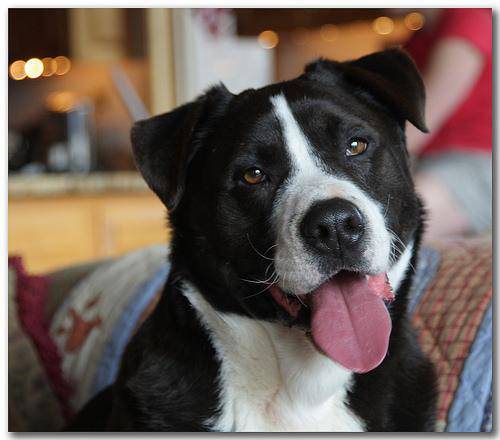

In [5]:
Image.open(os.listdir()[0])

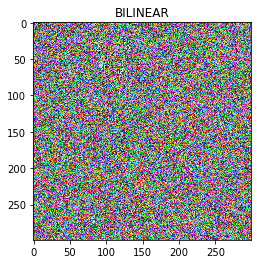

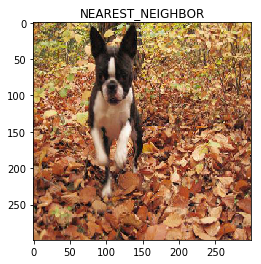

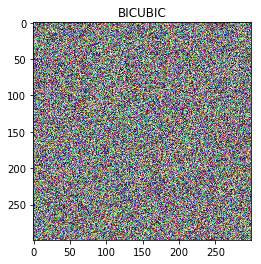

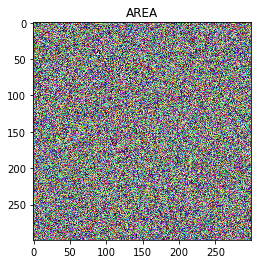

In [8]:
file_contents = tf.read_file(os.listdir()[0])
w = 299
h = 299

im = tf.image.decode_jpeg(file_contents)
im_bi = tf.image.resize_images(im, [w, h], method=tf.image.ResizeMethod.BILINEAR)
im_nn = tf.image.resize_images(im, [w, h], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
im_bic = tf.image.resize_images(im,[w, h], method=tf.image.ResizeMethod.BICUBIC)
im_ar = tf.image.resize_images(im, [w, h], method=tf.image.ResizeMethod.AREA)

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

img_bi, img_nn, img_bic, img_ar = sess.run([im_bi, im_nn, im_bic, im_ar])

plt.imshow(img_bi)
plt.title("BILINEAR")
plt.figure()

plt.imshow(img_nn)
plt.title("NEAREST_NEIGHBOR")
plt.figure()

plt.imshow(img_bic)
plt.title("BICUBIC")
plt.figure()

plt.imshow(img_ar)
plt.title('AREA')
plt.show()

We will go for NN (Nearest Neighbor)

#### Import the labels / training and test data

In [6]:
# Check the labels
#labels = pd.read_csv('C:\\Users\\oleg.smolanko\\Desktop\\11_HARVARD\\03_Machine_Learning_And_AI\\Week 8\\Homework 4\\labels.csv')
labels = pd.read_csv('~/Homework 4/labels.csv')
labels.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

The files may not be sorted in the way they are in folder. Therefore, while importing the pics, we will need to look up the name.

## RUN THIS CODE TO CREATE TRAINING SET AND LABELS

In [4]:
# 1. Load all the pics (train)
# 2. Parallel, create the output vector, based on the image selected to load in the matrix
# 3. Resize the pics loaded
# 4. Create a single file with the pixels array

#Check path first! It must be the folder where all the training pics are
#os.chdir('C:\\Users\\oleg.smolanko\\Desktop\\11_HARVARD\\03_Machine_Learning_And_AI\\Week 8\\Homework 4\\train')
os.chdir('/home/ubuntu/Homework 4/train')

# Set general parameters
n_files = len(os.listdir())
print(n_files)

im_f = [None]*n_files
y_train = []
w = 299
h = 299

for i in range(n_files):
    
    # Pics 
    file_contents = tf.read_file(os.listdir()[i])
    im = tf.image.decode_jpeg(file_contents)
    img = tf.image.resize_images(im, [w, h], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    im_f[i] = img
    
    # Output - match the breed according to the file name
    y_train.append(labels.loc[labels['id'] == os.listdir()[i][:-4], 'breed'].item())


sess = tf.Session()
img_conv = sess.run(im_f) 


# I tried to create an empty array with (np.empty([n_files, w*h*3]) but always got a Memroy error message - this is a workaround)
X_train = img_conv[i][:,:,:].reshape(img_conv[0].shape[0]*img_conv[0].shape[1]*img_conv[0].shape[2])

for i in range(1, n_files):
    X_train = np.vstack([X_train, img_conv[i][:,:,:].reshape(img_conv[i].shape[0]*img_conv[i].shape[1]*img_conv[i].shape[2])])
    if i % 1000 == 0:
        print(i)

10222
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [5]:
X_train.shape

(10222, 268203)

#### Create labels as encoding

In [6]:
y_train_labels = y_train # keep the names of the breeds in the right order and save them
y_train_output = np.array(pd.get_dummies(pd.DataFrame(y_train), prefix='', prefix_sep=''))
print(y_train_output.shape)

(10222, 120)


## RUN THIS CODE TO CREATE THE TEST SET

In [3]:
# 1. Load all the pics (test)
# 2. Resize the pics loaded
# 3. Create a single file with the pixels array

#Check path first! It must be the folder where all the training pics are
#os.chdir('C:\\Users\\oleg.smolanko\\Desktop\\11_HARVARD\\03_Machine_Learning_And_AI\\Week 8\\Homework 4\\test')
os.chdir('/home/ubuntu/Homework 4/test')

# Set general parameters
n_files = len(os.listdir())
print(n_files)

im_f = [None]*n_files
w = 299
h = 299


for i in range(n_files):
    
    # Pics 
    file_contents = tf.read_file(os.listdir()[i])
    im = tf.image.decode_jpeg(file_contents)
    img = tf.image.resize_images(im, [w, h], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    im_f[i] = img

    
sess = tf.Session()
img_conv = sess.run(im_f)  


# I tried to create an empty array with (np.empty([n_files, w*h*3]) but always got a Memroy error message - this is a workaround)
X_test = img_conv[i][:,:,:].reshape(img_conv[0].shape[0]*img_conv[0].shape[1]*img_conv[0].shape[2])

for i in range(1, n_files):
    X_test = np.vstack([X_test, img_conv[i][:,:,:].reshape(img_conv[i].shape[0]*img_conv[i].shape[1]*img_conv[i].shape[2])])
    if i % 1000 == 0:
        print(i)

10357
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [7]:
X_test.shape

(10357, 268203)

## Create Pickle File

In [8]:
# Create a path where to store the picke files - Part 1
os.chdir('/home/ubuntu/Homework 4/')
pickle_file = 'dogs_1.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_data': X_train[:5000, :],
        'train_output': y_train_output,
        'train_labels': y_train_labels,
        'test_data': X_test[:5000, :]
        }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 2683279129


In [9]:
# Create a path where to store the picke files - Part 2
pickle_file = 'dogs_2.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'train_data': X_train[5000:, :],
        #'train_output': y_train_output,
        #'train_labels': y_train_labels,
        'test_data': X_test[5000:, :]
        }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 2837319772


## Load Pickle File

In [61]:
# Create a path where to store the picke files is stored
# os.chdir('D:')
os.chdir('/home/ubuntu/Homework 4/')

pickle_file = 'dogs_1.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    x_train_1 = save['train_data']
    y_output = save['train_output']
    y_labels = save['train_labels']
    x_test_1 = save['test_data']
    del save  # to free up memory
    
    print('Training set', x_train_1.shape, y_output.shape)
    print('Test set', x_test_1.shape)

Training set (5000, 268203) (10222, 120)
Test set (5000, 268203)


In [62]:
# Create a path where to store the picke files is stored
# os.chdir('D:')
pickle_file = 'dogs_2.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    x_train_2 = save['train_data']
    #y_output = save['train_output']
    #y_labels = save['train_labels']
    x_test_2 = save['test_data']
    del save  # to free up memory
    
    print('Training set', x_train_2.shape)
    print('Test set', x_test_2.shape)

Training set (5222, 268203)
Test set (5357, 268203)


In [63]:
x_train = np.concatenate([x_train_1, x_train_2], axis = 0)
x_test = np.concatenate([x_test_1, x_test_2], axis = 0)
print(x_train.shape, x_test.shape)

(10222, 268203) (10357, 268203)


#### Check the data from the pickle file

In [64]:
# resetting variables if all steps above have been skipped
w = 299
h = 299

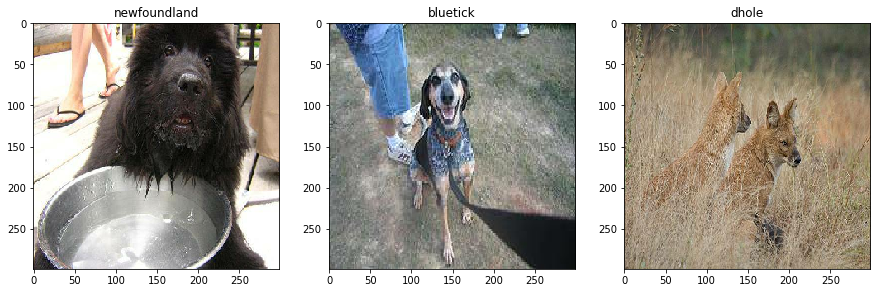

In [65]:
# check whether all been correct
f, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

pics = enumerate([32, 3452, 7698])

for i, j in pics:
    ax[i].set_title(y_labels[j], loc='center')
    ax[i].imshow(x_train[j].reshape(w, h, 3))

plt.show()
# looks good!

### Gray Scaling

In [24]:
# # Convert the image
# img = x_train[0].reshape(299, 299, 3)

# R = img[:, :, 0]
# G = img[:, :, 1]
# B = img[:, :, 2]
# img_gray = R * 299. / 1000 + G * 587. / 1000 + B * 114. / 1000

# # Show the image
# plt.imshow(img_gray, cmap='gray')
# plt.show()

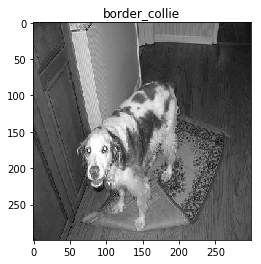

(299, 299)
(1, 89401)


In [66]:
# Check and test how the transformation might work
rgb2gray = lambda rgb:  np.dot(rgb.astype(float), [[0.2989],[0.5870],[0.1140]])
x = rgb2gray(x_train[0].reshape(w, h, 3))[:,:,0]

plt.imshow(x, cmap='gray')
plt.title(y_labels[0])
plt.show()
print(x.shape)
print(x.reshape(1, w*h).shape)

In [67]:
# Now we need to write a fucntion that loops thorugh each line in the database and converts it.
# Applying lamda function to the entire dataset gave an out of memory error.

# Create an empty array for future data
x_train_bw = np.empty([x_train.shape[0], w*h])

# Loop through the entire dataset
for i in range(x_train.shape[0]):
    bw_pic = rgb2gray(x_train[i].reshape(w, h, 3))[:,:,0]
    single_line = bw_pic.reshape(1, w*h)
    x_train_bw[i] = single_line
    if i % 1000 == 0:
        print(i)
        
print(x_train_bw.shape)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
(10222, 89401)


In [68]:
# Do the same for the test set

# Create an empty array for future data
x_test_bw = np.empty([x_test.shape[0], w*h])

# Loop through the entire dataset
for i in range(x_test.shape[0]):
    bw_pic = rgb2gray(x_test[i].reshape(w, h, 3))[:,:,0]
    single_line = bw_pic.reshape(1, w*h)
    x_test_bw[i] = single_line
    if i % 1000 == 0:
        print(i)
        
print(x_test_bw.shape)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
(10357, 89401)


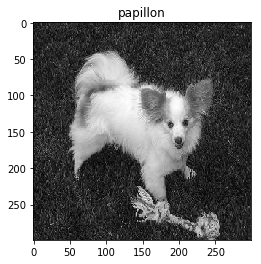

In [69]:
# Let's test if evertyhing went well in terms of processing
pic = x_train_bw[5].reshape(w, h)

plt.imshow(pic, cmap='gray')
plt.title(y_labels[5])
plt.show()

### Normalization

In [70]:
# Create a normalization function that normalizes values bewtween -1 and 1 and with mean=0
def normalize_image(dataset, epsilon=1e-10):
    """ Normalization of black and white image"""
    
    mean = np.mean(dataset, axis=(1,2), dtype=np.float32)
    std = np.std(dataset, axis=(1,2), dtype=np.float32, ddof=1)
    std[std < epsilon] = epsilon
    for i in range(dataset.shape[0]):
        dataset[i,:,:] = (dataset[i,:,:] - mean[i]) / std[i]
    
    return dataset


x_train_bw_norm = normalize_image(x_train_bw.reshape(x_train_bw.shape[0], w, h))
x_test_bw_norm = normalize_image(x_test_bw.reshape(x_test_bw.shape[0], w, h))

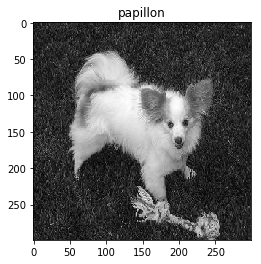

In [71]:
# Let's test if evertyhing went well in terms of processing
pic = x_train_bw_norm[5].reshape(w, h)

plt.imshow(pic, cmap='gray')
plt.title(y_labels[5])
plt.show()

In [72]:
# Create the train and test data and assign them to the respective obejcts
my_x_train = x_train_bw_norm.reshape(x_train_bw_norm.shape[0], w*h)
my_x_test = x_test_bw_norm.reshape(x_test_bw_norm.shape[0], w*h)

In [73]:
train_data = my_x_train
train_output = y_output
train_labels = y_labels
#test_data = my_x_test 
del my_x_train, y_output, y_labels#, my_x_test

### Split Train / Test

In [74]:
# we need to make sure that of every breed there are 70% in the train and 30% in the test.
passed_breed = []
train_index = []
test_index = []

# Build the indicies for train data
for breed in train_labels:
    if breed not in passed_breed:
        indicies = [i for i, j in enumerate(train_labels) if j == breed]     
        num_select = np.int(len(indicies)*0.7)       
        random_07 = random.sample(indicies, num_select)        
        train_index = train_index + random_07
        passed_breed.append(breed)

# Build the indicies for test data
for i in range(train_data.shape[0]):
    if i not in train_index:
        test_index = test_index + list(np.array([i]))

            
print(len(train_index))
print(len(test_index))

7101
3121


In [75]:
# Create train test split for data
x_train = train_data[train_index, :]
x_test = train_data[test_index, :]
x_train_output = train_output[train_index, :]
x_test_output = train_output[test_index, :]
x_full_labels = train_labels
x_train_labels = np.array(train_labels)[train_index]
x_test_labels = np.array(train_labels)[test_index]


print(x_train.shape, x_train_output.shape, len(x_train_labels))
print(x_test.shape, x_test_output.shape, len(x_test_labels))

(7101, 89401) (7101, 120) 7101
(3121, 89401) (3121, 120) 3121


In [76]:
# Check the distribution
print(pd.Series(x_train_labels).value_counts().head())
print(pd.Series(x_test_labels).value_counts().head())

scottish_deerhound      88
afghan_hound            81
maltese_dog             81
entlebucher             80
bernese_mountain_dog    79
dtype: int64
scottish_deerhound      38
maltese_dog             36
entlebucher             35
bernese_mountain_dog    35
afghan_hound            35
dtype: int64


# Create Pickle Files

In [27]:
# Create a path where to store the picke files - Part 1
# pickle_file = 'D:\\dogs_bw_norm_1.pickle'
pickle_file = 'dogs_bw_normal_1.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'x_train_data': x_train[:2500, :],
        'x_train_output': x_train_output[:2500, :],
        'x_test_data': x_test[:2500, :],
        'x_test_output': x_test_output[:2500, :],  
        'x_full_labels': x_full_labels,
        'x_train_labels': x_train_labels,
        'x_test_labels': x_test_labels,        
        'test_data': my_x_test[:2500, :]
        }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 5365887281


In [28]:
# Create a path where to store the picke files - Part 2
# pickle_file = 'D:\\dogs_bw_norm_1.pickle'
pickle_file = 'dogs_bw_normal_2.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'x_train_data': x_train[2500:5000, :],
        'x_train_output': x_train_output[2500:5000, :],
        'x_test_data': x_test[2500:, :],
        'x_test_output': x_test_output[2500:, :], 
        #'x_full_labels': x_full_labels,
        #'x_train_labels': x_train_labels,
        #'x_test_labels': x_test_labels,        
        'test_data': my_x_test[2500:5000, :]
        }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 4020559148


In [29]:
# Create a path where to store the picke files - Part 3
# pickle_file = 'D:\\dogs_bw_norm_1.pickle'
pickle_file = 'dogs_bw_normal_3.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'x_train_data': x_train[5000:, :],
        'x_train_output': x_train_output[5000:, :],
        #'x_test_data': x_test[2500:, :],
        #'x_test_output': x_test_output[2500:, :], 
        #'x_full_labels': x_full_labels,
        #'x_train_labels': x_train_labels,
        #'x_test_labels': x_test_labels,        
        'test_data': my_x_test[5000:, :]
        }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print('Unable to save data to', pickle_file, ':', e)
    raise
    
statinfo = os.stat(pickle_file)
print('Compressed pickle size:', statinfo.st_size)

Compressed pickle size: 5334273721


# Load Pickle Files

In [78]:
# Create a path where to store the picke files is stored - Part 1
os.chdir('/home/ubuntu/Homework 4/')
# os.chdir('D:')
pickle_file = 'dogs_bw_normal_1.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    x_train_1 = save['x_train_data']
    x_train_output_1 = save['x_train_output']
    x_test_1 = save['x_test_data']
    x_test_output_1 = save['x_test_output']
    x_full_labels = save['x_full_labels']
    x_train_labels = save['x_train_labels']
    x_test_labels = save['x_test_labels']       
    test_data_1 = save['test_data']
    del save  # to free up memory
    
    print('Training set', x_train_1.shape, x_train_output_1.shape)
    print('Test set', x_test_1.shape, x_test_output_1.shape)
    print('Labels', str(len(x_train_labels)), str(len(x_test_labels)))
    print('Real test', test_data_1.shape)

Training set (2500, 89401) (2500, 120)
Test set (2500, 89401) (2500, 120)
Labels 7101 3121
Real test (2500, 89401)


In [79]:
# Create a path where to store the picke files is stored - Part 2
# os.chdir('/home/ubuntu/Homework 4/')
# os.chdir('D:')
pickle_file = 'dogs_bw_normal_2.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    x_train_2 = save['x_train_data']
    x_train_output_2 = save['x_train_output']
    x_test_2 = save['x_test_data']
    x_test_output_2 = save['x_test_output']      
    #x_train_labels = save['x_train_labels']
    #x_test_labels = save['x_test_labels']       
    test_data_2 = save['test_data']
    del save  # to free up memory
    
    print('Training set', x_train_2.shape, x_train_output_2.shape)
    print('Test set', x_test_2.shape, x_test_output_2.shape)
    #print('Labels', str(len(x_train_labels)), str(len(x_test_labels)))
    print('Real test', test_data_2.shape)

Training set (2500, 89401) (2500, 120)
Test set (621, 89401) (621, 120)
Real test (2500, 89401)


In [80]:
# Create a path where to store the picke files is stored - Part 3
# os.chdir('/home/ubuntu/Homework 4/')
# os.chdir('D:')
pickle_file = 'dogs_bw_normal_3.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    x_train_3 = save['x_train_data']
    x_train_output_3 = save['x_train_output']
    #x_test_2 = save['x_test_data']
    #x_test_output_2 = save['x_test_output']      
    #x_train_labels = save['x_train_labels']
    #x_test_labels = save['x_test_labels']       
    test_data_3 = save['test_data']
    del save  # to free up memory
    
    print('Training set', x_train_3.shape, x_train_output_3.shape)
    #print('Test set', x_test_3.shape, x_test_output_3.shape)
    #print('Labels', str(len(x_train_labels)), str(len(x_test_labels)))
    print('Real test', test_data_3.shape)

Training set (2101, 89401) (2101, 120)
Real test (5357, 89401)


In [81]:
# Create train test split for data
x_train = np.concatenate([x_train_1, x_train_2, x_train_3], axis = 0)
x_test = np.concatenate([x_test_1, x_test_2], axis = 0)
x_train_output = np.concatenate([x_train_output_1, x_train_output_2, x_train_output_3], axis = 0)
x_test_output = np.concatenate([x_test_output_1, x_test_output_2], axis = 0)
x_train_labels = x_train_labels
x_test_labels = x_test_labels
x_real_test = np.concatenate([test_data_1, test_data_2, test_data_3], axis = 0)


print(x_train.shape, x_train_output.shape, len(x_train_labels))
print(x_test.shape, x_test_output.shape, len(x_test_labels))
print(x_real_test.shape)

(7101, 89401) (7101, 120) 7101
(3121, 89401) (3121, 120) 3121
(10357, 89401)


#                                        
# - PART 1 -


In [ ]:
# Variables:
# 1. Epochs
# 2. batch size
# 3. nodes
# 4. layers

# Addistions:
# 1. Regularization
# 2. Overfitting
# 3. Otimization
# 4. Activation functions

In [10]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1))
            / predictions.shape[0])

In [11]:
# Define diffrent activation functions
sigmoid = lambda t: 1 / (1 + np.exp(-t))
tanh = lambda t: (np.exp(t) - np.exp(-t)) / (np.exp(t) + np.exp(-t))
relu = lambda t: np.maximum(t,0.)

In [58]:
def run_session_single_layer(num_epochs, name, 
                             b_size=128, h_nodes=100, 
                             reg_func=False, lamb_reg=0.01, 
                             decr_opt='norm', 
                             drop=False, drop_prob=1.0,
                             prints=5):
    
    # General
    pics_size = x_train.shape[1]
    
    # Input Factors
    batch_size = b_size
    hidden_nodes = h_nodes
    reg_func = reg_func
    lamb_reg = lamb_reg
    decr_opt = decr_opt
    drop = drop
    prints = prints

    graph = tf.Graph()
    with graph.as_default():

        # Input data.
        tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, pics_size), name="TrainingData")
        tf_train_labelset = tf.placeholder(tf.float32, shape=(batch_size, 120), name="TrainingLabels")
        tf_test_dataset = tf.placeholder(tf.float32, shape=(x_test.shape[0], x_test.shape[1]), name="TestingData")
        tf_full_train = tf.placeholder(tf.float32, shape=(x_train.shape[0], pics_size), name="FullTrainingData")


        # Variables.
        layer1_weights = tf.Variable(tf.truncated_normal([pics_size, hidden_nodes]), name="weights1")
        layer1_biases = tf.Variable(tf.zeros([hidden_nodes]), name="biases1")
        
        layer2_weights = tf.Variable(tf.truncated_normal([hidden_nodes, 120]), name="weights2")
        layer2_biases = tf.Variable(tf.ones([120]), name="biases2")
        
        tf_keep_prob = tf.placeholder(tf.float32, name="DropProbability")
        
        ####################
        # MODEL
        ####################
        
        def model(data, name, proba=tf_keep_prob):
            with tf.name_scope(name) as scope:
                
                # LAYER 1
                layer1 = tf.add(tf.matmul(data, layer1_weights), layer1_biases, name="layer1")
                if drop == False:
                    hidden1 = tf.nn.relu(layer1, name="relu1")
                else:
                    hidden1 = tf.nn.dropout(tf.nn.relu(layer1), proba, name="dropout1") 
                
                # LAYER 2
                layer2 = tf.add(tf.matmul(hidden1, layer2_weights), layer2_biases, name="layer2")
                return layer2 

        # Training computation
        logits = model(tf_train_dataset, name="logits")
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = tf_train_labelset), name="loss")

        ####################
        # REGULARIZATION
        ####################
        
        # Regulirazation
        if reg_func == True:
            regularizers = (tf.nn.l2_loss(layer1_weights) + tf.nn.l2_loss(layer1_biases) + 
            tf.nn.l2_loss(layer2_weights) + tf.nn.l2_loss(layer2_biases))
            
            # Add the regularization term to the loss.
            loss += lamb_reg * regularizers

        ####################
        # LEARNIGN RATE
        ####################
        
        if decr_opt == 'norm':
            # Optimizer
            optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
        
        elif decr_opt == 'decr_learn_rate':
            # learning rate decay
            global_step = tf.Variable(0, name="globalstep")
            start_learning_rate = 0.05
            learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 100000, 0.97, staircase=True)
            optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
        
        elif decr_opt == 'adam':
            optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)
        
        elif decr_opt == 'momentum':    
            global_step = tf.Variable(0, name="globalstep")
            optimizer = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9).minimize(loss, global_step=global_step)

        # Predictions for the training, validation, and test data.
        train_prediction = tf.nn.softmax(logits)
        test_prediction = tf.nn.softmax(model(tf_test_dataset, "testing", 1.0))
        train_full_prediction = tf.nn.softmax(model(tf_full_train, "full_training", 1.0))

    ################################    
    # THE SESSION STARTS    
    ################################
    
    with tf.Session(graph=graph) as session:
        
        tf.global_variables_initializer().run() 
        
        #loss_summary = tf.summary.scalar('Loss', loss)
        #learning_rate_summary = tf.summary.scalar('Learning_rate', learning_rate)
        
        merged = tf.summary.merge_all()  
        writer = tf.summary.FileWriter("/tensorflowlogs", session.graph)
       
        print("Initialized")
        
        acc_train = [None]*num_epochs
        acc_test = [None]*num_epochs
        
        for epoch in range(num_epochs):
            
            offset = (epoch * batch_size) % (x_train.shape[0] - batch_size)
            
            batch_data = x_train[offset:(offset + batch_size), :]
            batch_labels = x_train_output[offset:(offset + batch_size), :]
            test_data = np.float32(x_test)
            
            feed_dict = {tf_train_dataset: batch_data, 
                         tf_train_labelset: batch_labels, 
                         tf_test_dataset: x_test,
                         tf_full_train: x_train
                        }
            
            if drop == True:
                feed_dict[tf_keep_prob] = drop_prob
            
            _, l, pred_train, pred_test, pred_train_full = session.run(
                [optimizer, loss, train_prediction, test_prediction, train_full_prediction], 
                feed_dict=feed_dict)        
            
            train_accuracy = accuracy(pred_train, batch_labels)
            test_accuracy = accuracy(pred_test, x_test_output)
            train_full_accuracy = accuracy(pred_train_full, x_train_output)
            
            acc_train[epoch] = train_accuracy
            acc_test[epoch] = test_accuracy
            
            if (epoch % prints == 0):
                print('Minibatch loss at epoch %d: %f' % (epoch, l))
                print('Minibatch accuracy: %.1f%%' % train_accuracy)
                print('Full train accuracy: %.1f%%' % train_full_accuracy)
                print('Test accuracy: %.1f%%' % test_accuracy)       
        
        return(acc_train, acc_test)        

### First 4 runs and trial:

Constant:
- epochs = 201
- batch size = 256
- hidden nodes = 500

Variations:
1. run - no addition
2. run - add regulirization function
3. run - add optimizer
4. run - add drop out at 50%

In [45]:
my_model = run_session_single_layer(201, "my_model", #reg_func=True, decr_opt='norm', drop=True, drop_prob=0.5, 
                                   b_size=512, h_nodes=500, prints=50)

Initialized
Minibatch loss at epoch 0: 9220.587891
Minibatch accuracy: 0.6%
Full train accuracy: 0.8%
Test accuracy: 0.7%
Minibatch loss at epoch 50: 43903.062500
Minibatch accuracy: 0.0%
Full train accuracy: 2.4%
Test accuracy: 1.2%
Minibatch loss at epoch 100: 54322.500000
Minibatch accuracy: 0.0%
Full train accuracy: 3.5%
Test accuracy: 0.8%
Minibatch loss at epoch 150: 791639.125000
Minibatch accuracy: 0.0%
Full train accuracy: 1.9%
Test accuracy: 1.0%
Minibatch loss at epoch 200: 1970983.750000
Minibatch accuracy: 1.2%
Full train accuracy: 1.7%
Test accuracy: 0.9%


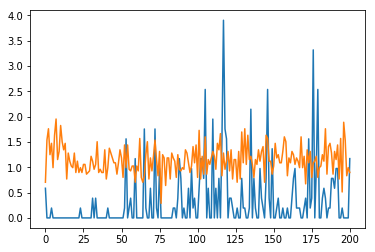

In [46]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

In [47]:
my_model = run_session_single_layer(201, "my_model", reg_func=True, #decr_opt='norm', drop=True, drop_prob=0.5, 
                                   b_size=512, h_nodes=500, prints=50)

Initialized
Minibatch loss at epoch 0: 183794.828125
Minibatch accuracy: 0.6%
Full train accuracy: 0.9%
Test accuracy: 0.7%
Minibatch loss at epoch 50: 223397.937500
Minibatch accuracy: 0.6%
Full train accuracy: 4.5%
Test accuracy: 1.6%
Minibatch loss at epoch 100: 252421.625000
Minibatch accuracy: 0.0%
Full train accuracy: 2.0%
Test accuracy: 1.1%
Minibatch loss at epoch 150: 477049.531250
Minibatch accuracy: 1.8%
Full train accuracy: 2.2%
Test accuracy: 0.9%
Minibatch loss at epoch 200: 2946399.250000
Minibatch accuracy: 0.0%
Full train accuracy: 2.7%
Test accuracy: 1.7%


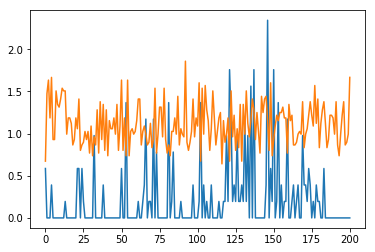

In [48]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

In [49]:
my_model = run_session_single_layer(201, "my_model", reg_func=True, decr_opt='norm', #drop=True, drop_prob=0.5, 
                                   b_size=512, h_nodes=500, prints=50)

Initialized
Minibatch loss at epoch 0: 183501.968750
Minibatch accuracy: 0.0%
Full train accuracy: 0.7%
Test accuracy: 0.6%
Minibatch loss at epoch 50: 209303.843750
Minibatch accuracy: 0.0%
Full train accuracy: 1.6%
Test accuracy: 0.9%
Minibatch loss at epoch 100: 298903.562500
Minibatch accuracy: 0.0%
Full train accuracy: 2.5%
Test accuracy: 1.4%
Minibatch loss at epoch 150: 1079773.500000
Minibatch accuracy: 0.0%
Full train accuracy: 1.1%
Test accuracy: 0.9%
Minibatch loss at epoch 200: 3231238.750000
Minibatch accuracy: 0.6%
Full train accuracy: 2.0%
Test accuracy: 1.8%


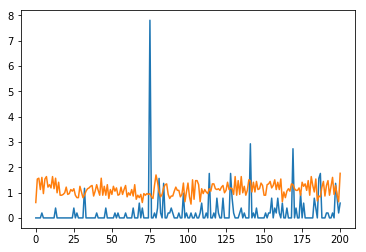

In [50]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

In [59]:
my_model = run_session_single_layer(201, "my_model", reg_func=True, decr_opt='norm', drop=True, drop_prob=0.5, 
                                    b_size=512, h_nodes=500, prints=50)

Initialized
Minibatch loss at epoch 0: 186111.234375
Minibatch accuracy: 1.0%
Full train accuracy: 0.7%
Test accuracy: 0.6%
Minibatch loss at epoch 50: 196651.000000
Minibatch accuracy: 0.2%
Full train accuracy: 2.5%
Test accuracy: 1.3%
Minibatch loss at epoch 100: 184294.078125
Minibatch accuracy: 0.4%
Full train accuracy: 2.9%
Test accuracy: 1.5%
Minibatch loss at epoch 150: 279756.125000
Minibatch accuracy: 0.0%
Full train accuracy: 2.3%
Test accuracy: 1.2%
Minibatch loss at epoch 200: 270696.187500
Minibatch accuracy: 2.1%
Full train accuracy: 3.7%
Test accuracy: 1.3%


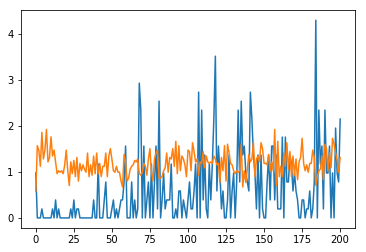

In [60]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

#### Conclusion from the first run: 
- the train accuracy is not significantly lower/greater
- no siginificant trend for improvement

-> increase number of epochs / batch size / nodes

### Second 4 runs and trial:

Constant:
- epochs = 501
- batch size = 1024
- hidden nodes = 1000

Variations:
1. run - no addition
2. run - add regulirization function
3. run - add optimizer
4. run - add drop out at 50%

In [65]:
my_model = run_session_single_layer(501, "my_model", #reg_func=True, decr_opt='norm', drop=True, drop_prob=0.5, 
                                   b_size=1024, h_nodes=1000, prints=100)

Initialized
Minibatch loss at epoch 0: 13421.275391
Minibatch accuracy: 0.9%
Full train accuracy: 1.1%
Test accuracy: 1.0%
Minibatch loss at epoch 100: 108853.187500
Minibatch accuracy: 2.3%
Full train accuracy: 6.9%
Test accuracy: 1.3%
Minibatch loss at epoch 200: 1011596.000000
Minibatch accuracy: 1.3%
Full train accuracy: 4.7%
Test accuracy: 0.9%
Minibatch loss at epoch 300: 17716240.000000
Minibatch accuracy: 0.2%
Full train accuracy: 3.4%
Test accuracy: 0.9%
Minibatch loss at epoch 400: 306423360.000000
Minibatch accuracy: 0.1%
Full train accuracy: 2.8%
Test accuracy: 1.3%
Minibatch loss at epoch 500: 3789702400.000000
Minibatch accuracy: 0.2%
Full train accuracy: 3.2%
Test accuracy: 1.6%


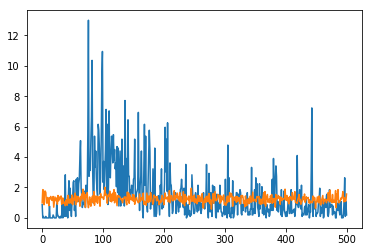

In [66]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

In [67]:
my_model = run_session_single_layer(501, "my_model", reg_func=True, #decr_opt='norm', drop=True, drop_prob=0.5, 
                                   b_size=1024, h_nodes=1000, prints=50)

Initialized
Minibatch loss at epoch 0: 361622.437500
Minibatch accuracy: 0.2%
Full train accuracy: 0.6%
Test accuracy: 0.6%
Minibatch loss at epoch 50: 373010.312500
Minibatch accuracy: 3.4%
Full train accuracy: 5.2%
Test accuracy: 0.8%
Minibatch loss at epoch 100: 421717.500000
Minibatch accuracy: 1.8%
Full train accuracy: 6.7%
Test accuracy: 1.3%
Minibatch loss at epoch 150: 604965.625000
Minibatch accuracy: 0.9%
Full train accuracy: 4.4%
Test accuracy: 1.6%
Minibatch loss at epoch 200: 861531.500000
Minibatch accuracy: 6.6%
Full train accuracy: 6.1%
Test accuracy: 1.1%
Minibatch loss at epoch 250: 3697391.500000
Minibatch accuracy: 0.8%
Full train accuracy: 2.7%
Test accuracy: 1.0%
Minibatch loss at epoch 300: 15660158.000000
Minibatch accuracy: 0.9%
Full train accuracy: 3.4%
Test accuracy: 1.7%
Minibatch loss at epoch 350: 73519744.000000
Minibatch accuracy: 2.2%
Full train accuracy: 4.0%
Test accuracy: 1.0%
Minibatch loss at epoch 400: 251251712.000000
Minibatch accuracy: 0.6%
Ful

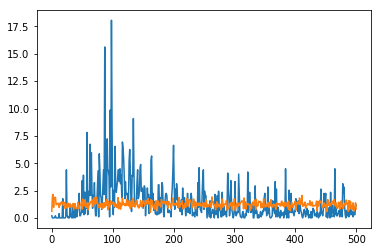

In [68]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

In [69]:
my_model = run_session_single_layer(501, "my_model", reg_func=True, decr_opt='norm', #drop=True, drop_prob=0.5, 
                                   b_size=1024, h_nodes=1000, prints=50)

Initialized
Minibatch loss at epoch 0: 358780.093750
Minibatch accuracy: 0.9%
Full train accuracy: 0.8%
Test accuracy: 0.5%
Minibatch loss at epoch 50: 412619.937500
Minibatch accuracy: 1.6%
Full train accuracy: 3.9%
Test accuracy: 1.5%
Minibatch loss at epoch 100: 390348.031250
Minibatch accuracy: 9.2%
Full train accuracy: 10.6%
Test accuracy: 0.8%
Minibatch loss at epoch 150: 597453.812500
Minibatch accuracy: 1.0%
Full train accuracy: 5.1%
Test accuracy: 1.0%
Minibatch loss at epoch 200: 1178852.250000
Minibatch accuracy: 2.8%
Full train accuracy: 5.0%
Test accuracy: 1.1%
Minibatch loss at epoch 250: 5214228.500000
Minibatch accuracy: 0.0%
Full train accuracy: 2.1%
Test accuracy: 1.2%
Minibatch loss at epoch 300: 15525268.000000
Minibatch accuracy: 1.1%
Full train accuracy: 3.2%
Test accuracy: 1.1%
Minibatch loss at epoch 350: 102246168.000000
Minibatch accuracy: 0.0%
Full train accuracy: 2.2%
Test accuracy: 1.1%
Minibatch loss at epoch 400: 164699200.000000
Minibatch accuracy: 2.9%


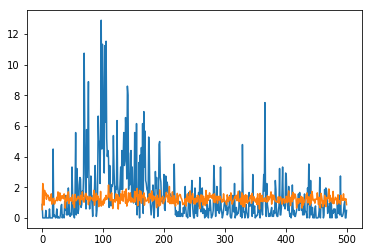

In [70]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

In [71]:
my_model = run_session_single_layer(501, "my_model", reg_func=True, decr_opt='norm', drop=True, drop_prob=0.5, 
                                   b_size=1024, h_nodes=1000, prints=50)

Initialized
Minibatch loss at epoch 0: 363694.406250
Minibatch accuracy: 1.0%
Full train accuracy: 0.8%
Test accuracy: 0.7%
Minibatch loss at epoch 50: 362197.375000
Minibatch accuracy: 1.6%
Full train accuracy: 5.1%
Test accuracy: 1.5%
Minibatch loss at epoch 100: 328870.812500
Minibatch accuracy: 10.9%
Full train accuracy: 23.5%
Test accuracy: 1.8%
Minibatch loss at epoch 150: 300654.531250
Minibatch accuracy: 53.9%
Full train accuracy: 64.7%
Test accuracy: 2.3%
Minibatch loss at epoch 200: 283494.437500
Minibatch accuracy: 78.5%
Full train accuracy: 86.0%
Test accuracy: 1.6%
Minibatch loss at epoch 250: 269408.500000
Minibatch accuracy: 85.8%
Full train accuracy: 89.0%
Test accuracy: 1.9%
Minibatch loss at epoch 300: 256208.359375
Minibatch accuracy: 89.6%
Full train accuracy: 93.3%
Test accuracy: 1.8%
Minibatch loss at epoch 350: 244151.125000
Minibatch accuracy: 76.1%
Full train accuracy: 93.9%
Test accuracy: 1.7%
Minibatch loss at epoch 400: 231776.796875
Minibatch accuracy: 93.5

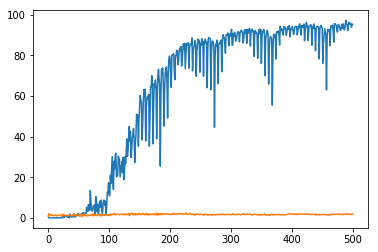

In [72]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

#### Conclusion from the second run: 
- notice: accuracy did not icrease until we added drop out
- however, the test accuracy does not increase along with the accuracy
- although the accuracy increases, the test accuracy stays at the same level
- this is due to the fact that there are so many cases (120 breeds) to learn on
- the good thing is that the loss decreases with higher number of epochs in comparison to the first three runs
- all these things clearly show that there is an overfitting taking place

steps forward:
- increase batch size / nodes and decrease the number epochs down to 200. As seen above, hopefully, one will be able to any improvement. 
- Also chosse another optimizer
- Change drop out to 70%.

In [73]:
my_model = run_session_single_layer(201, "my_model", reg_func=True, decr_opt='decr_learn_rate', drop=True, drop_prob=0.7, 
                                   b_size=2048, h_nodes=1500, prints=50)

Initialized
Minibatch loss at epoch 0: 538524.937500
Minibatch accuracy: 0.7%
Full train accuracy: 0.8%
Test accuracy: 0.6%
Minibatch loss at epoch 50: 497520.875000
Minibatch accuracy: 42.4%
Full train accuracy: 43.3%
Test accuracy: 2.1%
Minibatch loss at epoch 100: 469650.937500
Minibatch accuracy: 91.9%
Full train accuracy: 80.5%
Test accuracy: 2.4%
Minibatch loss at epoch 150: 446709.781250
Minibatch accuracy: 92.1%
Full train accuracy: 89.6%
Test accuracy: 1.9%
Minibatch loss at epoch 200: 424952.937500
Minibatch accuracy: 90.3%
Full train accuracy: 92.9%
Test accuracy: 1.9%


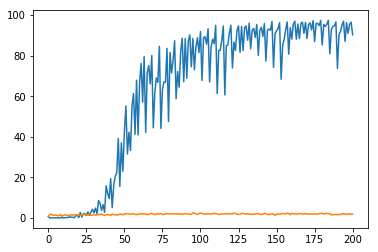

In [74]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

#### Conclusion from the second run: 
- this does not help

steps forward:
- decrease the size of mini batches again in order not overfit the mini-batches

In [76]:
my_model = run_session_single_layer(301, "my_model", reg_func=True, decr_opt='decr_learn_rate', drop=True, drop_prob=0.5, 
                                   b_size=1024, h_nodes=1024, prints=50)

Initialized
Minibatch loss at epoch 0: 373568.937500
Minibatch accuracy: 1.1%
Full train accuracy: 1.0%
Test accuracy: 0.7%
Minibatch loss at epoch 50: 369976.406250
Minibatch accuracy: 2.6%
Full train accuracy: 6.5%
Test accuracy: 1.0%
Minibatch loss at epoch 100: 331118.187500
Minibatch accuracy: 17.5%
Full train accuracy: 29.9%
Test accuracy: 1.2%
Minibatch loss at epoch 150: 306493.250000
Minibatch accuracy: 52.3%
Full train accuracy: 64.2%
Test accuracy: 2.1%
Minibatch loss at epoch 200: 290210.750000
Minibatch accuracy: 77.1%
Full train accuracy: 87.1%
Test accuracy: 1.8%
Minibatch loss at epoch 250: 275958.437500
Minibatch accuracy: 82.4%
Full train accuracy: 85.3%
Test accuracy: 2.0%
Minibatch loss at epoch 300: 262306.937500
Minibatch accuracy: 91.0%
Full train accuracy: 93.7%
Test accuracy: 1.6%


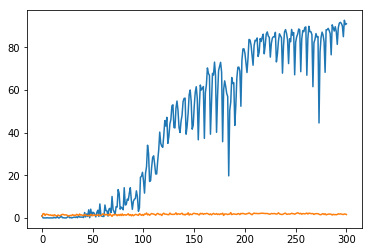

In [77]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

#### Conclusion from the second run: 
- this does not help again. I cannot increase the test accuracy

steps forward:
- try double layer

In [7]:
def weight_variable(shape, name):
    #initial = tf.truncated_normal(shape, stddev=0.01)
    initial = tf.truncated_normal(shape, stddev=tf.sqrt(2.0/shape[0]))
    return tf.Variable(initial, name=name)

In [8]:
def run_session_double_layer(num_epochs, name, 
                             b_size=128, 
                             h_nodes_1=512, h_nodes_2=216,
                             reg_func=False, lamb_reg=0.01, 
                             decr_opt='norm', 
                             drop=False, drop_prob=1.0,
                             prints=5):
    
    # General
    pics_size = x_train.shape[1]
    
    # Input Factors
    batch_size = b_size
    hidden_nodes_1 = h_nodes_1
    hidden_nodes_2 = h_nodes_2    
    reg_func = reg_func
    lamb_reg = lamb_reg
    decr_opt = decr_opt
    drop = drop
    prints = prints

    graph = tf.Graph()
    with graph.as_default():

        # Input data.
        tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, pics_size), name="TrainingData")
        tf_train_labelset = tf.placeholder(tf.float32, shape=(batch_size, 120), name="TrainingLabels")
        tf_test_dataset = tf.placeholder(tf.float32, shape=(x_test.shape[0], x_test.shape[1]), name="TestingData")
        tf_full_train = tf.placeholder(tf.float32, shape=(x_train.shape[0], pics_size), name="FullTrainingData")

        # Variables.
        layer1_weights = weight_variable([pics_size, hidden_nodes_1], name="weights1")
        layer1_biases = tf.Variable(tf.zeros([hidden_nodes_1]), name="biases1")
        
        layer2_weights = weight_variable([hidden_nodes_1, hidden_nodes_2], name="weights2")
        layer2_biases = tf.Variable(tf.zeros([hidden_nodes_2]), name="biases2")
         
        layer3_weights = weight_variable([hidden_nodes_2, 120], name="weights3")
        layer3_biases = tf.Variable(tf.ones(120), name="biases3")       
            
        tf_keep_prob = tf.placeholder(tf.float32, name="DropProbability")
        
        ####################
        # MODEL
        ####################
        
        def model(data, name, proba=tf_keep_prob):
            with tf.name_scope(name) as scope:
                
                # LAYER 1
                layer1 = tf.add(tf.matmul(data, layer1_weights), layer1_biases, name="layer1")
                if drop == False:
                    hidden1 = tf.nn.relu(layer1, name="relu1")
                else:
                    hidden1 = tf.nn.dropout(tf.nn.relu(layer1), proba, name="dropout1") 
                
                # LAYER 2
                layer2 = tf.add(tf.matmul(hidden1, layer2_weights), layer2_biases, name="layer2")
                if drop == False:
                    hidden2 = tf.nn.relu(layer2, name="relu2")
                else:
                    hidden2 = tf.nn.dropout(tf.nn.relu(layer2), proba, name="dropout2")                 
                                
                # LAYER 3
                layer3 = tf.add(tf.matmul(hidden2, layer3_weights), layer3_biases, name="layer3")
                return layer3 

        # Training computation
        logits = model(tf_train_dataset, name="logits")
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = tf_train_labelset), name="loss")

        ####################
        # REGULARIZATION
        ####################
        
        # Regulirazation
        if reg_func == True:
            regularizers = (tf.nn.l2_loss(layer1_weights) + tf.nn.l2_loss(layer1_biases) + 
                            tf.nn.l2_loss(layer2_weights) + tf.nn.l2_loss(layer2_biases) +
                            tf.nn.l2_loss(layer3_weights) + tf.nn.l2_loss(layer3_biases))
            
            # Add the regularization term to the loss.
            loss += lamb_reg * regularizers

        ####################
        # LEARNIGN RATE
        ####################
        
        if decr_opt == 'norm':
            # Optimizer
            optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
        
        elif decr_opt == 'decr_learn_rate':
            # learning rate decay
            global_step = tf.Variable(0, name="globalstep")
            start_learning_rate = 0.05
            learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 100000, 0.97, staircase=True)
            optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
        
        elif decr_opt == 'adam':
            optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)
        
        elif decr_opt == 'momentum':    
            global_step = tf.Variable(0, name="globalstep")
            optimizer = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9).minimize(loss, global_step=global_step)

        # Predictions for the training, validation, and test data.
        train_prediction = tf.nn.softmax(logits)
        test_prediction = tf.nn.softmax(model(tf_test_dataset, name="testing"), 1.0)
        train_full_prediction = tf.nn.softmax(model(tf_full_train, name="full_training"), 1.0)

    ################################    
    # THE SESSION STARTS    
    ################################
    
    with tf.Session(graph=graph) as session:
        
        tf.global_variables_initializer().run() 
        
        merged = tf.summary.merge_all()  
        writer = tf.summary.FileWriter("/tensorflowlogs", session.graph)
       
        print("Initialized")
        
        acc_train = [None]*num_epochs
        acc_test = [None]*num_epochs
        
        for epoch in range(num_epochs):
            
            offset = (epoch * batch_size) % (x_train.shape[0] - batch_size)
            
            batch_data = x_train[offset:(offset + batch_size), :]
            batch_labels = x_train_output[offset:(offset + batch_size), :]
            test_data = np.float32(x_test)
            
            feed_dict = {tf_train_dataset: batch_data, 
                         tf_train_labelset: batch_labels, 
                         tf_test_dataset: x_test,
                         tf_full_train: x_train
                        }
            
            if drop == True:
                feed_dict[tf_keep_prob] = drop_prob
            
            _, l, pred_train, pred_test, pred_train_full = session.run(
                [optimizer, loss, train_prediction, test_prediction, train_full_prediction], 
                feed_dict=feed_dict)      
            
            train_accuracy = accuracy(pred_train, batch_labels)
            test_accuracy = accuracy(pred_test, x_test_output)
            train_full_accuracy = accuracy(pred_train_full, x_train_output)
            
            acc_train[epoch] = train_accuracy
            acc_test[epoch] = test_accuracy
            
            if (epoch % prints == 0):
                print('Minibatch loss at epoch %d: %f' % (epoch, l))
                print('Minibatch accuracy: %.1f%%' % train_accuracy)
                print('Full train accuracy: %.1f%%' % train_full_accuracy)
                print('Test accuracy: %.1f%%' % test_accuracy)       
        
        return(acc_train, acc_test)   

### Let's try small in terms if size and layers and check the runtime

In [85]:
my_model = run_session_double_layer(301, "my_model", reg_func=True, decr_opt='adam', drop=True, drop_prob=0.5, 
                                   b_size=512, h_nodes_1=512, h_nodes_2=216, prints=50)

Initialized
Minibatch loss at epoch 0: 13.665136
Minibatch accuracy: 0.6%
Full train accuracy: 0.9%
Test accuracy: 0.6%
Minibatch loss at epoch 50: 13.728642
Minibatch accuracy: 1.8%
Full train accuracy: 2.8%
Test accuracy: 1.0%
Minibatch loss at epoch 100: 12.147036
Minibatch accuracy: 3.9%
Full train accuracy: 4.3%
Test accuracy: 1.0%
Minibatch loss at epoch 150: 11.683723
Minibatch accuracy: 4.7%
Full train accuracy: 6.9%
Test accuracy: 1.0%
Minibatch loss at epoch 200: 10.943168
Minibatch accuracy: 12.5%
Full train accuracy: 8.5%
Test accuracy: 0.9%
Minibatch loss at epoch 250: 10.644523
Minibatch accuracy: 12.9%
Full train accuracy: 11.1%
Test accuracy: 1.2%
Minibatch loss at epoch 300: 10.441536
Minibatch accuracy: 14.1%
Full train accuracy: 12.6%
Test accuracy: 1.2%


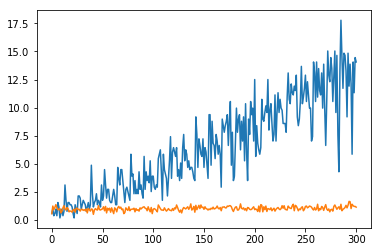

In [86]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

In [87]:
my_model = run_session_double_layer(301, "my_model", reg_func=True, decr_opt='adam', drop=True, drop_prob=0.5, 
                                   b_size=1024, h_nodes_1=1024, h_nodes_2=512, prints=50)

Initialized
Minibatch loss at epoch 0: 20.385038
Minibatch accuracy: 0.2%
Full train accuracy: 0.7%
Test accuracy: 0.6%
Minibatch loss at epoch 50: 17.506207
Minibatch accuracy: 10.6%
Full train accuracy: 10.1%
Test accuracy: 1.8%
Minibatch loss at epoch 100: 15.838269
Minibatch accuracy: 24.3%
Full train accuracy: 20.3%
Test accuracy: 1.4%
Minibatch loss at epoch 150: 14.642939
Minibatch accuracy: 34.6%
Full train accuracy: 31.6%
Test accuracy: 1.6%
Minibatch loss at epoch 200: 13.512798
Minibatch accuracy: 47.9%
Full train accuracy: 39.1%
Test accuracy: 1.4%
Minibatch loss at epoch 250: 12.631798
Minibatch accuracy: 53.9%
Full train accuracy: 48.0%
Test accuracy: 1.5%
Minibatch loss at epoch 300: 11.798758
Minibatch accuracy: 61.4%
Full train accuracy: 52.0%
Test accuracy: 1.7%


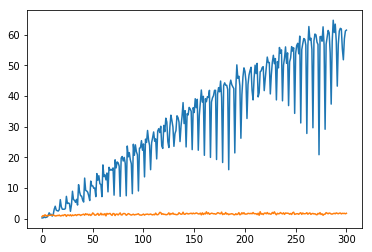

In [88]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

### More nodes gave better accuracy, however, not better test acuracy

- increase batch size
- choose another optimization
- decrease dropout

In [12]:
my_model = run_session_double_layer(301, "my_model", reg_func=True, decr_opt='momentum', drop=True, drop_prob=0.25, 
                                   b_size=2048, h_nodes_1=1024, h_nodes_2=512, prints=50)

Initialized
Minibatch loss at epoch 0: 24.001450
Minibatch accuracy: 0.5%
Full train accuracy: 0.8%
Test accuracy: 0.7%
Minibatch loss at epoch 50: 17.107014
Minibatch accuracy: 1.3%
Full train accuracy: 1.1%
Test accuracy: 0.7%
Minibatch loss at epoch 100: 15.773553
Minibatch accuracy: 3.1%
Full train accuracy: 1.8%
Test accuracy: 1.1%
Minibatch loss at epoch 150: 14.687598
Minibatch accuracy: 2.1%
Full train accuracy: 2.1%
Test accuracy: 1.4%
Minibatch loss at epoch 200: 13.848262
Minibatch accuracy: 1.9%
Full train accuracy: 2.5%
Test accuracy: 1.4%
Minibatch loss at epoch 250: 12.644526
Minibatch accuracy: 6.6%
Full train accuracy: 3.4%
Test accuracy: 1.2%
Minibatch loss at epoch 300: 11.702702
Minibatch accuracy: 9.2%
Full train accuracy: 4.2%
Test accuracy: 1.3%


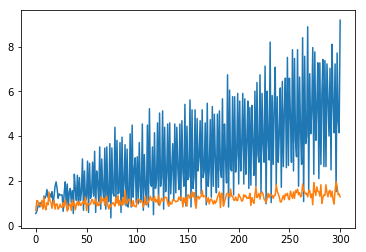

In [13]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

In [14]:
my_model = run_session_double_layer(301, "my_model", reg_func=True, decr_opt='decr_learn_rate', drop=True, drop_prob=0.3, 
                                   b_size=2048, h_nodes_1=2048, h_nodes_2=1024, prints=50)

Initialized
Minibatch loss at epoch 0: 34.376938
Minibatch accuracy: 0.8%
Full train accuracy: 1.1%
Test accuracy: 0.7%
Minibatch loss at epoch 50: 28.565010
Minibatch accuracy: 5.2%
Full train accuracy: 4.3%
Test accuracy: 1.4%
Minibatch loss at epoch 100: 26.771900
Minibatch accuracy: 12.0%
Full train accuracy: 7.7%
Test accuracy: 1.4%
Minibatch loss at epoch 150: 25.564844
Minibatch accuracy: 15.9%
Full train accuracy: 11.7%
Test accuracy: 1.5%
Minibatch loss at epoch 200: 24.934839
Minibatch accuracy: 13.1%
Full train accuracy: 17.4%
Test accuracy: 1.8%
Minibatch loss at epoch 250: 22.457092
Minibatch accuracy: 35.0%
Full train accuracy: 22.6%
Test accuracy: 1.6%
Minibatch loss at epoch 300: 21.094036
Minibatch accuracy: 45.9%
Full train accuracy: 29.7%
Test accuracy: 1.8%


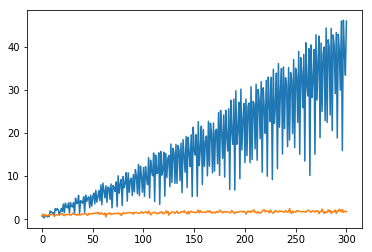

In [15]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

### Conclusion:

- not of the adjustments help to increase the test accuracy.
- I changed the drop outs percentarge as well but it did not show any siginificant change
- The good thing is that the loss decreases with each epoch systematically

Steps forward:
- create a tripple layer

In [46]:
def run_session_tripple_layer(num_epochs, name, 
                             b_size=128, 
                             h_nodes_1=1024, h_nodes_2=512, h_nodes_3=216,
                             reg_func=False, lamb_reg=0.01, 
                             decr_opt='norm', 
                             drop=False, drop_prob=1.0,
                             prints=5):
    
    # General
    pics_size = x_train.shape[1]
    
    # Input Factors
    batch_size = b_size
    hidden_nodes_1 = h_nodes_1
    hidden_nodes_2 = h_nodes_2    
    hidden_nodes_3 = h_nodes_3  
    reg_func = reg_func
    lamb_reg = lamb_reg
    decr_opt = decr_opt
    drop = drop
    prints = prints

    graph = tf.Graph()
    with graph.as_default():

        # Input data.
        tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, pics_size), name="TrainingData")
        tf_train_labelset = tf.placeholder(tf.float32, shape=(batch_size, 120), name="TrainingLabels")
        tf_test_dataset = tf.placeholder(tf.float32, shape=(x_test.shape[0], x_test.shape[1]), name="TestingData")
        tf_full_train = tf.placeholder(tf.float32, shape=(x_train.shape[0], pics_size), name="FullTrainingData")
        tf_test_full = tf.placeholder(tf.float32, shape=(x_real_test.shape[0], x_real_test.shape[1]), name="FullTrainingData")

        # Variables.
        layer1_weights = weight_variable([pics_size, hidden_nodes_1], name="weights1")
        layer1_biases = tf.Variable(tf.zeros([hidden_nodes_1]), name="biases1")
        
        layer2_weights = weight_variable([hidden_nodes_1, hidden_nodes_2], name="weights2")
        layer2_biases = tf.Variable(tf.zeros([hidden_nodes_2]), name="biases2")
        
        layer3_weights = weight_variable([hidden_nodes_2, hidden_nodes_3], name="weights3")
        layer3_biases = tf.Variable(tf.zeros([hidden_nodes_3]), name="biases3")
        
        layer4_weights = weight_variable([hidden_nodes_3, 120], name="weights4")
        layer4_biases = tf.Variable(tf.ones(120), name="biases4")       
            
        tf_keep_prob = tf.placeholder(tf.float32, name="DropProbability")
        
        ####################
        # MODEL
        ####################
        
        def model(data, name, proba=tf_keep_prob):
            with tf.name_scope(name) as scope:
                
                # LAYER 1
                layer1 = tf.add(tf.matmul(data, layer1_weights), layer1_biases, name="layer1")
                if drop == False:
                    hidden1 = tf.nn.relu(layer1, name="relu1")
                else:
                    hidden1 = tf.nn.dropout(tf.nn.relu(layer1), proba, name="dropout1") 
                
                # LAYER 2
                layer2 = tf.add(tf.matmul(hidden1, layer2_weights), layer2_biases, name="layer2")
                if drop == False:
                    hidden2 = tf.nn.relu(layer2, name="relu2")
                else:
                    hidden2 = tf.nn.dropout(tf.nn.relu(layer2), proba, name="dropout2")                 
                
                # LAYER 3
                layer3 = tf.add(tf.matmul(hidden2, layer3_weights), layer3_biases, name="layer3")
                if drop == False:
                    hidden3 = tf.nn.relu(layer3, name="relu3")
                else:
                    hidden3 = tf.nn.dropout(tf.nn.relu(layer3), proba, name="dropout3")  
                    
                # LAYER 3
                layer4 = tf.add(tf.matmul(hidden3, layer4_weights), layer4_biases, name="layer4")
                return layer4

        # Training computation
        logits = model(tf_train_dataset, name="logits")
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels = tf_train_labelset), name="loss")

        ####################
        # REGULARIZATION
        ####################
        
        # Regulirazation
        if reg_func == True:
            regularizers = (tf.nn.l2_loss(layer1_weights) + tf.nn.l2_loss(layer1_biases) + 
                            tf.nn.l2_loss(layer2_weights) + tf.nn.l2_loss(layer2_biases) +
                            tf.nn.l2_loss(layer3_weights) + tf.nn.l2_loss(layer3_biases) +
                            tf.nn.l2_loss(layer4_weights) + tf.nn.l2_loss(layer4_biases))
            
            # Add the regularization term to the loss.
            loss += lamb_reg * regularizers

        ####################
        # LEARNIGN RATE
        ####################
        
        if decr_opt == 'norm':
            # Optimizer
            optimizer = tf.train.GradientDescentOptimizer(0.05).minimize(loss)
        
        elif decr_opt == 'decr_learn_rate':
            # learning rate decay
            global_step = tf.Variable(0, name="globalstep")
            start_learning_rate = 0.05
            learning_rate = tf.train.exponential_decay(start_learning_rate, global_step, 100000, 0.97, staircase=True)
            optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss, global_step=global_step)
        
        elif decr_opt == 'adam':
            optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)
        
        elif decr_opt == 'momentum':    
            global_step = tf.Variable(0, name="globalstep")
            optimizer = tf.train.MomentumOptimizer(learning_rate=0.01, momentum=0.9).minimize(loss, global_step=global_step)

        # Predictions for the training, validation, and test data.
        train_prediction = tf.nn.softmax(logits)
        test_prediction = tf.nn.softmax(model(tf_test_dataset, name="testing"), 1.0)
        train_full_prediction = tf.nn.softmax(model(tf_full_train, name="full_training"), 1.0)
        test_full_prediction = tf.nn.softmax(model(tf_test_full, name="full_test"), 1.0)
        saver = tf.train.Saver()   # a saver variable to save the model
        
    ################################    
    # THE SESSION STARTS    
    ################################
    
    with tf.Session(graph=graph) as session:
        
        tf.global_variables_initializer().run() 
        
        merged = tf.summary.merge_all()  
        writer = tf.summary.FileWriter("/tmp/tensorflowlogs", session.graph)
       
        print("Initialized")
        
        acc_train = [None]*num_epochs
        acc_test = [None]*num_epochs
        
        for epoch in range(num_epochs):
            
            offset = (epoch * batch_size) % (x_train.shape[0] - batch_size)
            
            batch_data = x_train[offset:(offset + batch_size), :]
            batch_labels = x_train_output[offset:(offset + batch_size), :]
            test_data = np.float32(x_test)
            
            feed_dict = {tf_train_dataset: batch_data, 
                         tf_train_labelset: batch_labels, 
                         tf_test_dataset: x_test,
                         tf_full_train: x_train,
                         tf_test_full: x_real_test
                        }
            
            if drop == True:
                feed_dict[tf_keep_prob] = drop_prob
            
            _, l, pred_train, pred_test, pred_train_full, pred_test_full = session.run(
                [optimizer, loss, train_prediction, test_prediction, train_full_prediction, test_full_prediction], 
                feed_dict=feed_dict)      
            
            train_accuracy = accuracy(pred_train, batch_labels)
            test_accuracy = accuracy(pred_test, x_test_output)
            train_full_accuracy = accuracy(pred_train_full, x_train_output)
            
            acc_train[epoch] = train_accuracy
            acc_test[epoch] = test_accuracy
            
            if (epoch % prints == 0):
                print('Minibatch loss at epoch %d: %f' % (epoch, l))
                print('Minibatch accuracy: %.1f%%' % train_accuracy)
                print('Full train accuracy: %.1f%%' % train_full_accuracy)
                print('Test accuracy: %.1f%%' % test_accuracy)       
        
        
        
        
        save_path = saver.save(session, "/home/ubuntu/Homework 4/tmp/tensoflowmodels/" + name +".ckpt")
        print("Model saved in file: %s" % save_path)
        return(acc_train, acc_test, pred_test_full)   

#### Run basic model and see if it works

In [19]:
my_model = run_session_tripple_layer(301, "my_model", reg_func=True, decr_opt='decr_learn_rate', drop=True, drop_prob=0.3, 
                                   b_size=1024, prints=50)

Initialized
Minibatch loss at epoch 0: 28.140099
Minibatch accuracy: 0.9%
Full train accuracy: 0.7%
Test accuracy: 1.0%
Minibatch loss at epoch 50: 19.112820
Minibatch accuracy: 1.1%
Full train accuracy: 1.2%
Test accuracy: 0.9%
Minibatch loss at epoch 100: 18.363327
Minibatch accuracy: 0.1%
Full train accuracy: 1.2%
Test accuracy: 1.2%
Minibatch loss at epoch 150: 17.677769
Minibatch accuracy: 0.0%
Full train accuracy: 1.2%
Test accuracy: 1.1%
Minibatch loss at epoch 200: 17.042597
Minibatch accuracy: 0.1%
Full train accuracy: 1.3%
Test accuracy: 1.2%
Minibatch loss at epoch 250: 16.429506
Minibatch accuracy: 0.0%
Full train accuracy: 1.2%
Test accuracy: 1.2%
Minibatch loss at epoch 300: 15.850123
Minibatch accuracy: 8.4%
Full train accuracy: 1.3%
Test accuracy: 1.2%


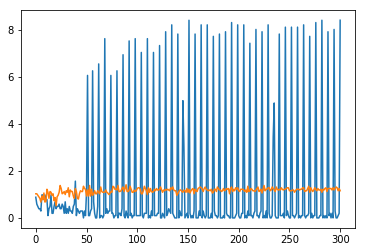

In [20]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

### Let's icrease the size of the batch and numebr of hidden nodes

In [22]:
my_model = run_session_tripple_layer(301, "my_model", reg_func=True, decr_opt='decr_learn_rate', drop=True, drop_prob=0.5, 
                                   b_size=2048, h_nodes_1=2048, h_nodes_2=1024, h_nodes_3=512, prints=50)

Initialized
Minibatch loss at epoch 0: 36.800949
Minibatch accuracy: 1.1%
Full train accuracy: 0.8%
Test accuracy: 0.9%
Minibatch loss at epoch 50: 32.290768
Minibatch accuracy: 4.6%
Full train accuracy: 3.7%
Test accuracy: 1.5%
Minibatch loss at epoch 100: 30.440771
Minibatch accuracy: 10.0%
Full train accuracy: 7.0%
Test accuracy: 1.4%
Minibatch loss at epoch 150: 29.077473
Minibatch accuracy: 13.6%
Full train accuracy: 10.3%
Test accuracy: 1.6%
Minibatch loss at epoch 200: 28.299847
Minibatch accuracy: 11.3%
Full train accuracy: 15.8%
Test accuracy: 2.0%
Minibatch loss at epoch 250: 25.623037
Minibatch accuracy: 37.8%
Full train accuracy: 22.6%
Test accuracy: 2.3%
Minibatch loss at epoch 300: 23.995878
Minibatch accuracy: 49.4%
Full train accuracy: 30.4%
Test accuracy: 2.3%


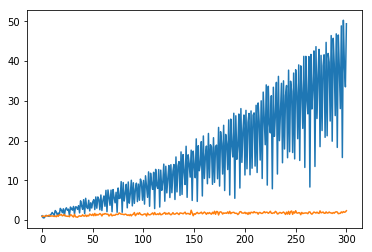

In [23]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

#### Let's try with more epochs

In [24]:
my_model = run_session_tripple_layer(1001, "my_model", reg_func=True, decr_opt='decr_learn_rate', drop=True, drop_prob=0.5, 
                                   b_size=2048, h_nodes_1=2048, h_nodes_2=1024, h_nodes_3=512, prints=200)

Initialized
Minibatch loss at epoch 0: 36.921539
Minibatch accuracy: 0.9%
Full train accuracy: 0.9%
Test accuracy: 0.6%
Minibatch loss at epoch 200: 28.282925
Minibatch accuracy: 11.1%
Full train accuracy: 16.2%
Test accuracy: 2.0%
Minibatch loss at epoch 400: 22.315582
Minibatch accuracy: 41.7%
Full train accuracy: 44.4%
Test accuracy: 2.0%
Minibatch loss at epoch 600: 17.431969
Minibatch accuracy: 78.2%
Full train accuracy: 63.7%
Test accuracy: 2.0%
Minibatch loss at epoch 800: 14.022074
Minibatch accuracy: 94.7%
Full train accuracy: 75.7%
Test accuracy: 2.2%
Minibatch loss at epoch 1000: 11.607430
Minibatch accuracy: 97.9%
Full train accuracy: 81.1%
Test accuracy: 1.9%


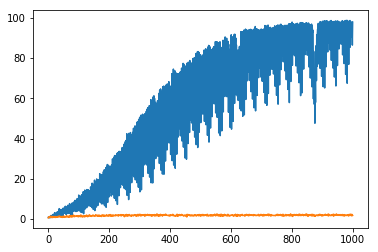

In [25]:
plt.plot(my_model[0])
plt.plot(my_model[1])
plt.show()

In [47]:
my_model = run_session_tripple_layer(1, "my_model", reg_func=True, decr_opt='decr_learn_rate', drop=True, drop_prob=0.5, 
                                   b_size=2048, h_nodes_1=2048, h_nodes_2=1024, h_nodes_3=512, prints=200)

Initialized
Minibatch loss at epoch 0: 36.512512
Minibatch accuracy: 0.9%
Full train accuracy: 0.7%
Test accuracy: 0.7%
Model saved in file: /home/ubuntu/Homework 4/tmp/tensoflowmodels/my_model.ckpt


#### I will use this model to build a prediction

In [87]:
os.chdir('/home/ubuntu/Homework 4/test')
test_name = []

for i in range(len(os.listdir())):
    test_name.append(os.listdir()[i][:-4])

In [130]:
submission_test = pd.DataFrame(my_model[2], index = test_name, columns=sorted(set(x_full_labels)))

os.chdir('/home/ubuntu/Homework 4')
submission_test.to_csv('my_submission.csv')

# Your submission scored 7.32352

# Conclusion:

- the are so many breeds (120) in the data that it is very hard to train
- although the model perforamcne sigificantly improved with drop out function, I was not able to increase the test accuracy
- the data gets overfitted very quick
- in the graphs one can see that no real balance between batch size, nodes, number of layer, drop out percentrage could be found in order to improve the test accuracy
- it was difficult to run different combinations as one run took quite a while (approx between 30 minutes and one hour)

# Kaggle Name : "amldm34"

#                                        
# - PART 2 -


# I have made use of transfer learning to leverage a pre-trained keras CNN on ImageNet that has already demonstrated state of the art performance. 



    
    


## Keras makes it very easy to access several pre-trained CNN architectures on ImageNet. I will be using four architectures, 
    1. Inception V3
    2. Xception
    3. Resnet
    4. VGG19
    

# Further I will make use of ensemble learning as it usually shows better results due to several reasons including reducing overfitting 

* First, I will prepare the data (Dog images)
* Get prediction for each model(InceptionV3, VGG, Xception)
* Combine the results from all models.

# I have used Keras because of following reasons:

1. Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
2. Supports both convolutional networks and recurrent networks, as well as combinations of the two.
3. Runs seamlessly on CPU and GPU.



* As shown below, I have imported all the required modules for keras, such as Sequential model type, "core" layers such as Dense, Flatten etc. 
* Also imported are CNN layers from Keras such as GlobalAveragePooling2D, MaxPooling2D etc

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os
import keras
from os import listdir, makedirs, getcwd, remove
from os.path import isfile, join, abspath, exists, isdir, expanduser
from tqdm import tqdm
from keras.models import Model, Sequential
from keras.layers import Input, GlobalAveragePooling2D, Dense, Conv2D, MaxPooling2D, Dropout, Lambda, Reshape, Flatten
from keras import backend as K
from keras.optimizers import Adam
from keras.applications.inception_v3 import preprocess_input
import matplotlib.image as mpimg
import seaborn as sns
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception

np.random.seed(2)

Using TensorFlow backend.


# -- Step 1 -- 

In [4]:
import os
os.chdir('/home/ubuntu/HW4_finalData/')



# Data Preparation

In [54]:
# Reading labels and sample_submission
df = pd.read_csv('labels.csv')
df_test = pd.read_csv('sample_submission.csv')
df.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

# Number of classes of breeds

In [7]:
n = len(df)
breed = set(df['breed'])
n_class = len(breed)
class_to_num = dict(zip(breed, range(n_class)))
num_to_class = dict(zip(range(n_class), breed))
len(breed)

120

# For all the models, I have used image pixel size of 299x299 .

# Loading the training and labels data

In [8]:
width = 299
X = np.zeros((n, width, width, 3), dtype=np.uint8) # buffer for images
y = np.zeros((n, n_class), dtype=np.uint8) # buffer for label
for i in tqdm(range(n)): 
    X[i] = cv2.resize(cv2.imread('train/%s.jpg' % df['id'][i]), (width, width))
    y[i][class_to_num[df['breed'][i]]] = 1



100%|██████████| 10222/10222 [00:51<00:00, 200.40it/s]


# Loading the test data

In [9]:
width = 299
n_test = len(df_test)
X_test = np.zeros((n_test, width, width, 3), dtype=np.uint8)
for i in tqdm(range(n_test)):
    X_test[i] = cv2.resize(cv2.imread('test/%s.jpg' % df_test['id'][i]), (width, width))

100%|██████████| 10357/10357 [00:49<00:00, 207.65it/s]


# Distribution of Output Variable

100%|██████████| 10222/10222 [00:00<00:00, 10678.98it/s]


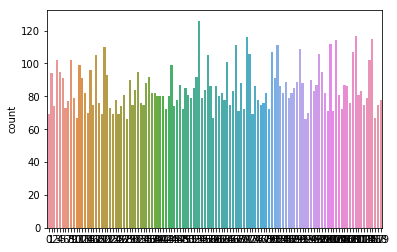

In [10]:
y_eda = [list(i).index(1) for i in tqdm(y, total=n)]
g = sns.countplot(y_eda)

* Balancing weight for each class will improve LB score

# Some random pictures from the training data and their respective labels from label data

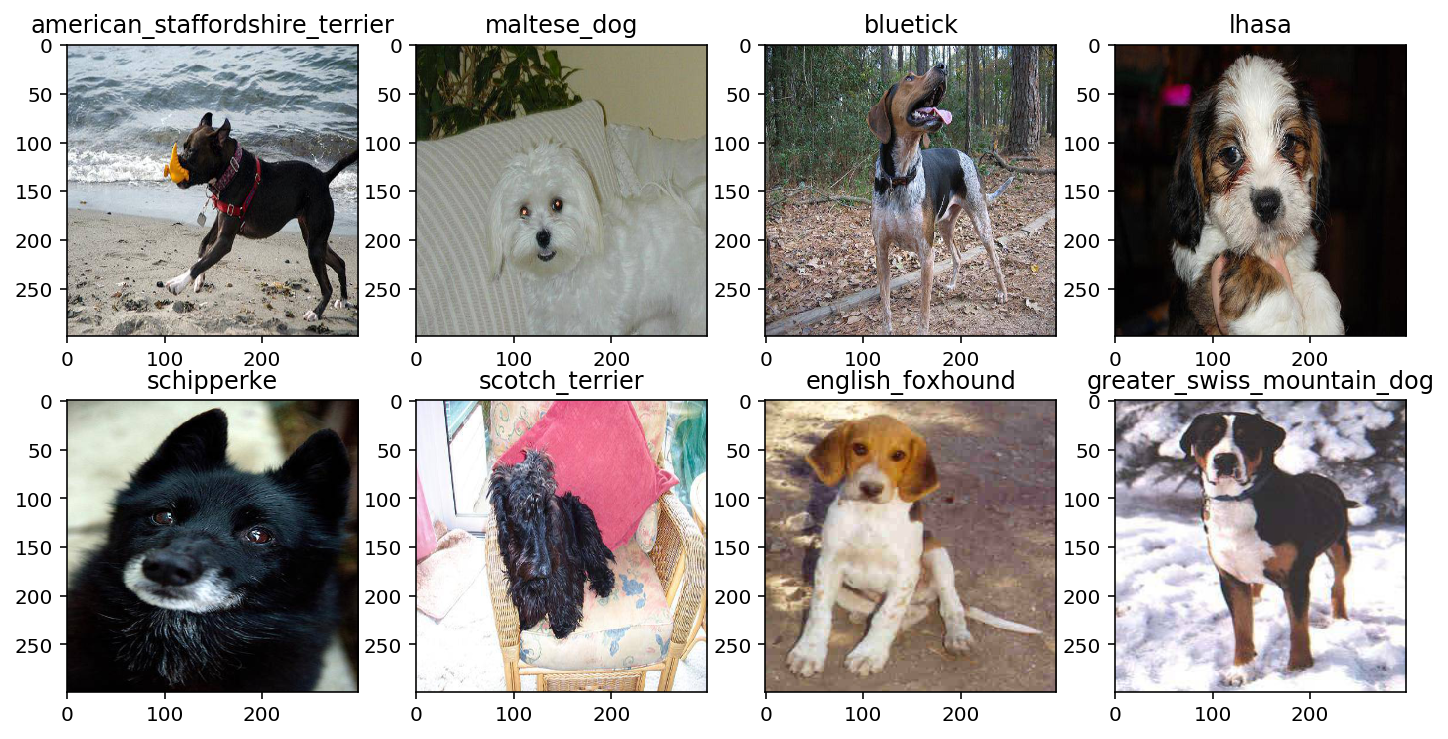

In [57]:
import random
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(12, 6))
for i in range(8):
    random_index = random.randint(0, n-1)
    plt.subplot(2, 4, i+1)
    plt.imshow(X[random_index][:,:,::-1])
    plt.title(num_to_class[y[random_index].argmax()])

# Feature Extraction

## Extract the bottleneck features

* Training with pretrained CNN models in Keras became possible in a Kaggle kernel.
* Bottleneck features are saved just in case the computer is out of resources




In [11]:
cache_dir = expanduser(join('~', '.keras'))
if not exists(cache_dir):
    makedirs(cache_dir)
models_dir = join(cache_dir, 'models')
if not exists(models_dir):
    makedirs(models_dir)




## Copy the keras-pretrained-models to ~/.keras/models

# !cp /home/ubuntu/HW4_finalData/keras-pretrained-models/* ~/.keras/models/

In [32]:
def get_features(MODEL, data=X, batch_size=4):
    cnn_model = MODEL(include_top=False, input_shape=(width, width, 3), weights='imagenet')
    
    inputs = Input((width, width, 3))
    x = inputs
    x = Lambda(preprocess_input, name='preprocessing')(x)
    x = cnn_model(x)
    x = GlobalAveragePooling2D()(x)
    cnn_model = Model(inputs, x)

    features = cnn_model.predict(data, batch_size=batch_size, verbose=1)
    return features

In [34]:
os.getcwd()

'/home/ubuntu/HW4_finalData'

# Let us explore the four architectures that I am going to use 

# InceptionV3 model

* The goal of the inception module is to act as a “multi-level feature extractor” by computing 1×1, 3×3, and 5×5 convolutions within the same module of the network — the output of these filters are then stacked along the channel dimension and before being fed into the next layer in the network.

* The weights for Inception V3 are smaller than VGG and ResNet, coming in at 96MB.

* GlobalAveragePooling2D layer is used before predictions layer. 
* Ideally global average pooling works with taking the average of each feature map and feed the resulting vector directly into the softmax layer.







### Advantages of GlobalAveragePooling :
    1) More native to the convolutional structure
    2) No parameter to optimize. Overfitting is avoided at this layer.
    3) More robust to spatial translations of input
    4) Allows for flexibility in input size

In [60]:
InceptionV3().summary()

96116736/96112376 [==============================] - 1s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_24 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_197 (Conv2D)             (None, None, None, 3 864         input_24[0][0]                   
__________________________________________________________________________________________________
batch_normalization_197 (BatchN (None, None, None, 3 96          conv2d_197[0][0]                 
__________________________________________________________________________________________________
activation_434 (Activation)     (None, None, None, 3 0           batch_normalization_197[0][0]    
____________________________________________

# Xception Architecture

* Xception is an extension of the Inception architecture which replaces the standard Inception modules with depthwise separable convolutions.
* The architecture has 36 convolutional stages. 
* GlobalAveragePooling2D layer is used before predictions layer. 
* Ideally global average pooling works with taking the average of each feature map and feed the resulting vector directly into the softmax layer.





In [62]:
Xception().summary()

91889664/91884032 [==============================] - 1s 0us/step
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           (None, None, None, 3 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, None, None, 3 864         input_25[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, None, None, 3 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, None, None, 3 0           block1_conv1_bn[0][0]            
____________________________________________

# VGG19 architecture

* The VGG19  is characterized by its simplicity, using only 3×3 convolutional layers stacked on top of each other in increasing depth. 

* Reducing volume size is handled by max pooling. Two fully-connected layers, each with 4,096 nodes are then followed by a softmax classifier.

* The “16” and “19” stand for the number of weight layers in the network. Here I would be using 19 weight layers and hence VGG19 architecture. 

* Due to its depth and number of fully-connected nodes, VGG is over 533MB for VGG16 and 574MB for VGG19. This makes deploying VGG a tiresome task


# Drawbacks of VGG19 that I found during the course :


1. It was painfully slow to train.
2. The network architecture weights themselves are quite large (in terms of disk/bandwidth)

# VGG19 architectural layers

* As can be seen from summary() of VGG19, notice five blocks of (two to four) convolutional layers followed by a max pooling layer. The final max pooling layer is then flattened and followed by three densely connected layers.

* Notice that most of the parameters in the model belong to the fully connected layers.

In [59]:
VGG19().summary()

574717952/574710816 [==============================] - 6s 0us/step
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_po

# ResNet50 Architecture

* ResNet relies on micro-architecture modules also called “network-in-network architectures” as compared to traditional sequential architectures such as "AlexNet" or "VGG".

* Even though ResNet is much deeper than VGG16 and VGG19, the model size is actually substantially smaller due to the usage of global average pooling rather than fully-connected layers — this reduces the model size down to 102MB for ResNet50

* In residual learning, instead of trying to learn some features, we try to learn some residual. Residual can be simply understood as subtraction of feature learned from input of that layer. ResNet does this using shortcut connections (directly connecting input of nth layer to some (n+x)th layer. It has proved that training this form of networks is easier than training simple deep convolutional neural networks and also the problem of degrading accuracy is resolved.




In [63]:
ResNet50().summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_26 (InputLayer)           (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        input_26[0][0]                   
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
__________________________________________________________________________________________________
activation_528 (Activation)     (None, 112, 112, 64) 0           bn_conv1[0][0]                   
__________________________________________________________________________________________________
max_poolin

# Let's embark on getting features for the training data-set "X" for the four architectures

# InceptionV3¶


In [35]:
inception_features = get_features(InceptionV3, X)
np.savez('bottleneck_features/inception_features.npz' , X=inception_features)

10222/10222 [==============================] - 248s 24ms/step


# VGG19

In [14]:
vgg_features = get_features(VGG19, X)
np.savez('bottleneck_features/vgg_features.npz' , X=vgg_features)

10222/10222 [==============================] - 2516s 246ms/step


# Resnet50


In [15]:
resnet_features = get_features(ResNet50, X)
np.savez('bottleneck_features/resnet_features.npz' , X=resnet_features)

10222/10222 [==============================] - 1326s 130ms/step


# Xception

In [36]:
xception_features = get_features(Xception, X)
np.savez('bottleneck_features/xception_features.npz' , X=xception_features)

10222/10222 [==============================] - 253s 25ms/step


# Splitting into the training/valid data-set 



In [19]:
X_train_xception, X_valid_xception, y_train_xception, y_valid_xception =  train_test_split(xception_features, y, test_size=0.2, random_state=99)
X_train_inception, X_valid_inception, y_train_inception, y_valid_inception = train_test_split(inception_features, y, test_size=0.2, random_state=99)
X_train_vgg, X_valid_vgg, y_train_vgg, y_valid_vgg = train_test_split(vgg_features, y, test_size=0.2, random_state=99)
X_train_resnet, X_valid_resnet, y_train_resnet, y_valid_resnet = train_test_split(resnet_features, y, test_size=0.2, random_state=99)

# Classifiers


# Neural Net



In [37]:
print("***Inception_model****")

Inception_model = Sequential()
Inception_model.add(Dropout(0.2, input_shape=inception_features.shape[1:]))
Inception_model.add(Dense(n_class, activation='softmax'))

Inception_model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'],
           )

Inception_model.summary()

print("***Xception_model***")

Xception_model = Sequential()
Xception_model.add(Dropout(0.2, input_shape=xception_features.shape[1:]))
Xception_model.add(Dense(n_class, activation='softmax'))

Xception_model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'],
           )

Xception_model.summary()


print("***VGG_model***")

VGG_model = Sequential()
VGG_model.add(Dropout(0.2, input_shape=vgg_features.shape[1:]))
VGG_model.add(Dense(n_class, activation='softmax'))

VGG_model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'], 
           )

VGG_model.summary()

print("***Resnet_model***")

Resnet_model = Sequential()
Resnet_model.add(Dropout(0.2, input_shape=resnet_features.shape[1:]))
Resnet_model.add(Dense(n_class, activation='softmax'))

Resnet_model.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'],
           )

Resnet_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_5 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 120)               245880    
Total params: 245,880
Trainable params: 245,880
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_6 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 120)               245880    
Total params: 245,880
Trainable params: 245,880
Non-trainable params: 0
_________________________________________________________________
________________________________________________________________

# Callbacks


* ModelCheckpoint is used to get the best model after epochs
* ReduceLROnPlateau is used to manipulate learning rate for more delciate correction

In [38]:
inception_callbacks=[ReduceLROnPlateau(monitor='acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001),
                      ModelCheckpoint(filepath='saved_models/inception.best.from_features.hdf5', 
                               verbose=1, save_best_only=True)
                     ]

xception_callbacks=[ReduceLROnPlateau(monitor='acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001),
                      ModelCheckpoint(filepath='saved_models/xception.best.from_features.hdf5', 
                               verbose=1, save_best_only=True)
                     ]

resnet_callbacks=[ReduceLROnPlateau(monitor='acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001),
                      ModelCheckpoint(filepath='saved_models/resnet.best.from_features.hdf5', 
                               verbose=1, save_best_only=True)
                     ]

vgg_callbacks=[ReduceLROnPlateau(monitor='acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001),
                      ModelCheckpoint(filepath='saved_models/vgg.best.from_features.hdf5', 
                               verbose=1, save_best_only=True)
                     ]

In [39]:
epochs = 20 # We are taking 20 epochs 


from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight('balanced', np.unique(y_eda), y_eda)

print("*****Inception_Model******")
inception_history = Inception_model.fit(X_train_inception, y_train_inception, 
          validation_data=(X_valid_inception, y_valid_inception),
          epochs=epochs, 
          callbacks=inception_callbacks,
          class_weight=class_weight,
          batch_size=8, verbose=1)

print("*****Xception_Model******")
xception_history = Xception_model.fit(X_train_xception, y_train_xception, 
          validation_data=(X_valid_xception, y_valid_xception),
          epochs=epochs,                            
          callbacks=xception_callbacks,
          class_weight=class_weight,
          batch_size=8, verbose=1)

print("*****Resnet_Model******")
resnet_history = Resnet_model.fit(X_train_resnet, y_train_resnet, 
          validation_data=(X_valid_resnet, y_valid_resnet),
          epochs=epochs, 
          callbacks=resnet_callbacks,
          class_weight=class_weight,
          batch_size=8, verbose=1)

print("*****VGG_Model******")
vgg_history = VGG_model.fit(X_train_vgg, y_train_vgg, 
          validation_data=(X_valid_vgg, y_valid_vgg),
          epochs=epochs, 
          callbacks=vgg_callbacks,
          class_weight=class_weight,
          batch_size=8, verbose=1)

*****Inception_Model******
Train on 8177 samples, validate on 2045 samples
Epoch 1/20
8177/8177 [==============================] - 6s 774us/step - loss: 1.3357 - acc: 0.6555 - val_loss: 0.8391 - val_acc: 0.7477
Epoch 2/20
8177/8177 [==============================] - 4s 467us/step - loss: 0.5541 - acc: 0.8207 - val_loss: 0.8507 - val_acc: 0.7443
Epoch 3/20
8177/8177 [==============================] - 4s 468us/step - loss: 0.4080 - acc: 0.8678 - val_loss: 0.8650 - val_acc: 0.7584
Epoch 4/20
8177/8177 [==============================] - 4s 470us/step - loss: 0.3086 - acc: 0.8978 - val_loss: 0.7880 - val_acc: 0.7692
Epoch 5/20
8177/8177 [==============================] - 4s 470us/step - loss: 0.2484 - acc: 0.9212 - val_loss: 0.9533 - val_acc: 0.7555
Epoch 6/20
8177/8177 [==============================] - 4s 469us/step - loss: 0.1954 - acc: 0.9341 - val_loss: 0.8261 - val_acc: 0.7731
Epoch 7/20
8177/8177 [==============================] - 4s 465us/step - loss: 0.1681 - acc: 0.9453 - val_loss

Epoch 11/20
8177/8177 [==============================] - 4s 468us/step - loss: 0.0659 - acc: 0.9861 - val_loss: 0.6624 - val_acc: 0.8244
Epoch 12/20
8177/8177 [==============================] - 4s 465us/step - loss: 0.0563 - acc: 0.9896 - val_loss: 0.7082 - val_acc: 0.8186
Epoch 13/20
8177/8177 [==============================] - 4s 466us/step - loss: 0.0494 - acc: 0.9910 - val_loss: 0.6858 - val_acc: 0.8205
Epoch 14/20
8177/8177 [==============================] - 4s 465us/step - loss: 0.0438 - acc: 0.9902 - val_loss: 0.7038 - val_acc: 0.8156
Epoch 15/20
8177/8177 [==============================] - 4s 463us/step - loss: 0.0378 - acc: 0.9950 - val_loss: 0.6964 - val_acc: 0.8200
Epoch 16/20
8177/8177 [==============================] - 4s 463us/step - loss: 0.0342 - acc: 0.9933 - val_loss: 0.7448 - val_acc: 0.8147
Epoch 17/20
8177/8177 [==============================] - 4s 467us/step - loss: 0.0322 - acc: 0.9935 - val_loss: 0.7328 - val_acc: 0.8191
Epoch 18/20
8177/8177 [==================

Epochs = 20


* InceptionV3 ---- loss: 0.0568 - acc: 0.9808 - val_loss: 1.1260 - val_acc: 0.7839 
* Xception    ---- loss: 0.0170 - acc: 0.9983 - val_loss: 0.7414 - val_acc: 0.8269 
* Resnet50    ---- loss: 3.7718 - acc: 0.1573 - val_loss: 4.7459 - val_acc: 0.0445
* VGG19 model ---- loss: 1.4447 - acc: 0.6571 - val_loss: 1.8420 - val_acc: 0.5301

* As can be seen from the above results, the InceptionV3 and Xception architectures give good results but ResNet50 and VGG19 model performs poorly. 

## Evaluation

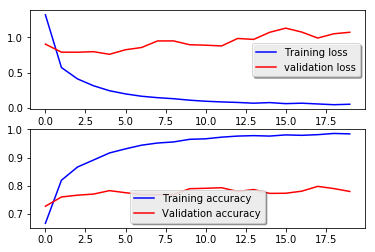

In [23]:
# Plot the loss and accuracy curves for training and validation on InceptionV3
fig, ax = plt.subplots(2,1)
ax[0].plot(inception_history.history['loss'], color='b', label="Training loss")
ax[0].plot(inception_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(inception_history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(inception_history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

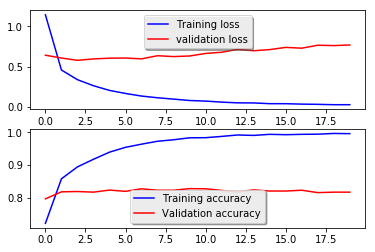

In [24]:
# Plot the loss and accuracy curves for training and validation on xception model
fig, ax = plt.subplots(2,1)
ax[0].plot(xception_history.history['loss'], color='b', label="Training loss")
ax[0].plot(xception_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(xception_history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(xception_history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

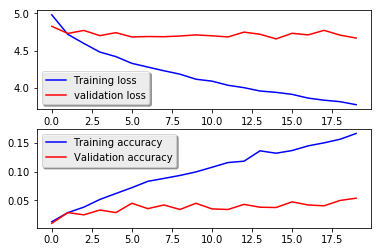

In [25]:
# Plot the loss and accuracy curves for training and validation on resnet model
fig, ax = plt.subplots(2,1)
ax[0].plot(resnet_history.history['loss'], color='b', label="Training loss")
ax[0].plot(resnet_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(resnet_history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(resnet_history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

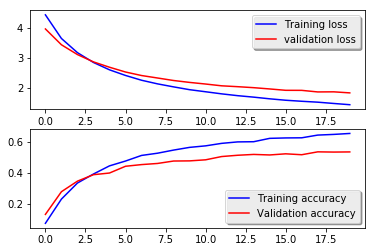

In [26]:
# Plot the loss and accuracy curves for training and validation on vgg model
fig, ax = plt.subplots(2,1)
ax[0].plot(vgg_history.history['loss'], color='b', label="Training loss")
ax[0].plot(vgg_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(vgg_history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(vgg_history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

# Confusion Matrix

* Confusion matrix will check false positives for each labels.
* It will also visualize bias and variance of each model's prediction.

# InceptionV3

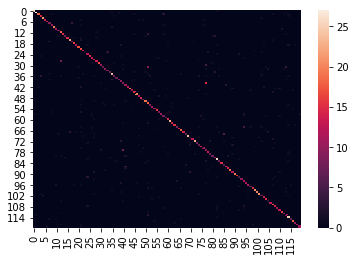

In [27]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = Inception_model.predict(X_valid_inception)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_valid_inception,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
ax = sns.heatmap(confusion_mtx)

# Xception

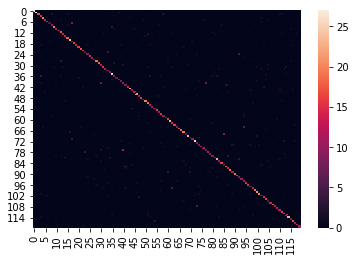

In [28]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = Xception_model.predict(X_valid_xception)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_valid_xception,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
ax = sns.heatmap(confusion_mtx)

# ResNet50

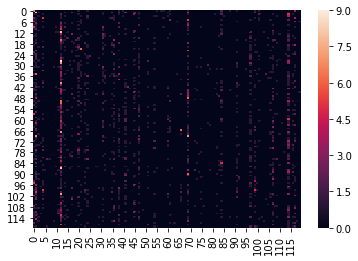

In [29]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = Resnet_model.predict(X_valid_resnet)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_valid_resnet,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
ax = sns.heatmap(confusion_mtx)

# VGG19

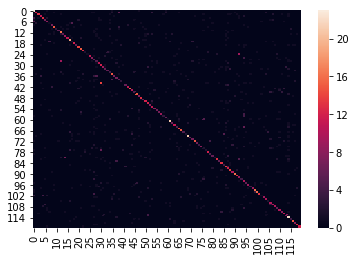

In [30]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = VGG_model.predict(X_valid_vgg)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_valid_vgg,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
ax = sns.heatmap(confusion_mtx)

# Prediction on the test data-set


# Inception

In [31]:
inception_features_test = get_features(InceptionV3, X_test)
np.savez('bottleneck_features/inception_features_test.npz' , X_test=inception_features_test)

10357/10357 [==============================] - 825s 80ms/step


# Xception

In [32]:
xception_features_test = get_features(Xception, X_test)
np.savez('bottleneck_features/xception_features_test.npz' , X_test=xception_features_test)

10357/10357 [==============================] - 1660s 160ms/step


# Resnet50

In [33]:
resnet_features_test = get_features(ResNet50, X_test)
np.savez('bottleneck_features/resnet_features_test.npz' , X_test=resnet_features_test)

10357/10357 [==============================] - 1350s 130ms/step


# VGG19

In [34]:
vgg_features_test = get_features(VGG19, X_test)
np.savez('bottleneck_features/vgg_features_test.npz' , X_test=vgg_features_test)

10357/10357 [==============================] - 2556s 247ms/step


# Loading the weights for highest accuracy results 

In [41]:
Inception_model.load_weights('/home/ubuntu/HW4_finalData/saved_models/inception.best.from_features.hdf5')
Xception_model.load_weights('/home/ubuntu/HW4_finalData/saved_models/xception.best.from_features.hdf5')
Resnet_model.load_weights('/home/ubuntu/HW4_finalData/saved_models/resnet.best.from_features.hdf5')
VGG_model.load_weights('/home/ubuntu/HW4_finalData/saved_models/vgg.best.from_features.hdf5')

# Making predictions for four different architectures and generating individual csv files

1. Inception : pred_inception.csv
2. Xception  : pred_xception.csv
3. Resnet50 : pred_resnet.csv
4. VGG19 : pred_vgg.csv

In [42]:
y_pred = Inception_model.predict(inception_features_test, batch_size=128)
for b in breed:
    df_test[b] = y_pred[:,class_to_num[b]]
inception_test = df_test.copy()
df_test.to_csv('pred_inception.csv', index=None)

y_pred = Xception_model.predict(xception_features_test, batch_size=128)
for b in breed:
    df_test[b] = y_pred[:,class_to_num[b]]
xception_test = df_test.copy()
df_test.to_csv('pred_xception.csv', index=None)

y_pred = Resnet_model.predict(resnet_features_test, batch_size=128)
for b in breed:
    df_test[b] = y_pred[:,class_to_num[b]]
resnet_test = df_test.copy()
df_test.to_csv('pred_resnet.csv', index=None)

y_pred = VGG_model.predict(vgg_features_test, batch_size=128)
for b in breed:
    df_test[b] = y_pred[:,class_to_num[b]]
vgg_test = df_test.copy()
df_test.to_csv('pred_vgg.csv', index=None)

# Combining the results from all the 4 architectures while creating an ensemble result and final stacked "pred_stacked.csv" file which was used to submit to kaggle. 

In [43]:
n_model = 4
id_test = inception_test['id']
sum_test = inception_test.drop('id', axis=1) + xception_test.drop('id', axis=1) + resnet_test.drop('id', axis=1) + vgg_test.drop('id', axis=1)
ensemble_test = (np.exp(sum_test / n_model) - 1)
ensemble_test.insert(0, 'id', id_test)

ensemble_test.to_csv('predictionsStacked.csv', index=None)

# Score on Kaggle

## The above submission to kaggle had the public score of 0.89731

# -- Step 2 --

# I found out that if ResNet and VGG models use the keras.applications.vgg19.preprocess_input preprocessing fuction in case of VGG which uses mode='caffe' which converts RGB->BGR and subtracts ImageNet mean colors without scaling the results might improve a bit. 

# Let's try that

In [20]:
os.chdir('/home/ubuntu/HW4_finalData/')



In [21]:
os.getcwd()

'/home/ubuntu/HW4_finalData'

# Here lets create a new get_features_new() function which has an additional preprocessing_input parameter

In [50]:
def get_features_new(MODEL, data, preprocessing_input, batch_size=4):
    cnn_model = MODEL(include_top=False, input_shape=(width, width, 3), weights='imagenet')
    
    inputs = Input((width, width, 3))
    x = inputs
    x = Lambda(preprocess_input, name='preprocessing')(x)
    x = cnn_model(x)
    x = GlobalAveragePooling2D()(x)
    cnn_model = Model(inputs, x)

    features = cnn_model.predict(data, batch_size=batch_size, verbose=1)
    return features

# Creating a new features set for ResNet50 and VGG19 architecture

In [51]:
new_resnet_features = get_features_new(ResNet50, X, keras.applications.resnet50.preprocess_input)
np.savez('/home/ubuntu/HW4_finalData/new_features/new_resnet_features.npz' , X=new_resnet_features)

10222/10222 [==============================] - 273s 27ms/step


In [17]:
new_vgg_features = get_features_new(VGG19, X, keras.applications.vgg19.preprocess_input)
np.savez('/home/ubuntu/HW4_finalData/new_features/new_vgg_features.npz' , X=new_vgg_features)

10222/10222 [==============================] - 522s 51ms/step


# Splitting into train/valid data-set

In [18]:
X_train_vgg_new, X_valid_vgg_new, y_train_vgg_new, y_valid_vgg_new = train_test_split(new_vgg_features, y, test_size=0.2, random_state=99)
X_train_resnet_new, X_valid_resnet_new, y_train_resnet_new, y_valid_resnet_new = train_test_split(new_resnet_features, y, test_size=0.2, random_state=99)

# Rest of the steps similar as earlier

In [19]:
VGG_model_new = Sequential()
VGG_model_new.add(Dropout(0.2, input_shape=new_vgg_features.shape[1:]))
VGG_model_new.add(Dense(n_class, activation='softmax'))

VGG_model_new.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'], 
           )

VGG_model_new.summary()

Resnet_model_new = Sequential()
Resnet_model_new.add(Dropout(0.2, input_shape=new_resnet_features.shape[1:]))
Resnet_model_new.add(Dense(n_class, activation='softmax'))

Resnet_model_new.compile(optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy'],
           )

Resnet_model_new.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               61560     
Total params: 61,560
Trainable params: 61,560
Non-trainable params: 0
_________________________________________________________________
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_2 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 120)               245880    
Total params: 245,880
Trainable params: 245,880
Non-trainable params: 0
_________________________________________________________________


# Callbacks

In [23]:
new_resnet_callbacks=[ReduceLROnPlateau(monitor='acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001),
                      ModelCheckpoint(filepath='new_saved_models/resnet.best.from_features.hdf5', 
                               verbose=1, save_best_only=True)
                     ]

new_vgg_callbacks=[ReduceLROnPlateau(monitor='acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001),
                      ModelCheckpoint(filepath='new_saved_models/vgg.best.from_features.hdf5', 
                               verbose=1, save_best_only=True)
                     ]

In [25]:
epochs = 50 # Increasing the epochs too

from sklearn.utils import class_weight

class_weight = class_weight.compute_class_weight('balanced', np.unique(y_eda), y_eda)


new_resnet_history = Resnet_model_new.fit(X_train_resnet_new, y_train_resnet_new, 
          validation_data=(X_valid_resnet_new, y_valid_resnet_new),
          epochs=epochs, 
          callbacks=new_resnet_callbacks,
          class_weight=class_weight,
          batch_size=8, verbose=1)

new_vgg_history = VGG_model_new.fit(X_train_vgg_new, y_train_vgg_new, 
          validation_data=(X_valid_vgg_new, y_valid_vgg_new),
          epochs=epochs, 
          callbacks=new_vgg_callbacks,
          class_weight=class_weight,
          batch_size=8, verbose=1)

Train on 8177 samples, validate on 2045 samples
Epoch 1/50
8177/8177 [==============================] - 4s 448us/step - loss: 3.7653 - acc: 0.1631 - val_loss: 4.7434 - val_acc: 0.0396
Epoch 2/50
8177/8177 [==============================] - 4s 453us/step - loss: 3.7316 - acc: 0.1716 - val_loss: 4.7036 - val_acc: 0.0528
Epoch 3/50
8177/8177 [==============================] - 4s 451us/step - loss: 3.7176 - acc: 0.1730 - val_loss: 4.7919 - val_acc: 0.0411
Epoch 4/50
8177/8177 [==============================] - 4s 447us/step - loss: 3.6835 - acc: 0.1790 - val_loss: 4.7195 - val_acc: 0.0469
Epoch 5/50
8177/8177 [==============================] - 4s 450us/step - loss: 3.6634 - acc: 0.1856 - val_loss: 4.7878 - val_acc: 0.0469
Epoch 6/50
8177/8177 [==============================] - 4s 448us/step - loss: 3.6448 - acc: 0.1882 - val_loss: 4.7360 - val_acc: 0.0548
Epoch 7/50
8177/8177 [==============================] - 4s 451us/step - loss: 3.6204 - acc: 0.1942 - val_loss: 4.7474 - val_acc: 0.0489


Epoch 33/50
8177/8177 [==============================] - 4s 451us/step - loss: 3.2075 - acc: 0.2722 - val_loss: 4.9101 - val_acc: 0.0484
Epoch 34/50
8177/8177 [==============================] - 4s 450us/step - loss: 3.2053 - acc: 0.2727 - val_loss: 4.8626 - val_acc: 0.0469
Epoch 35/50
8177/8177 [==============================] - 4s 452us/step - loss: 3.1956 - acc: 0.2723 - val_loss: 4.8937 - val_acc: 0.0474
Epoch 36/50
8177/8177 [==============================] - 4s 447us/step - loss: 3.1549 - acc: 0.2785 - val_loss: 4.8956 - val_acc: 0.0465
Epoch 37/50
8177/8177 [==============================] - 4s 451us/step - loss: 3.1479 - acc: 0.2846 - val_loss: 4.8767 - val_acc: 0.0499
Epoch 38/50
8177/8177 [==============================] - 4s 448us/step - loss: 3.1380 - acc: 0.2829 - val_loss: 4.9517 - val_acc: 0.0548
Epoch 39/50
8177/8177 [==============================] - 4s 448us/step - loss: 3.1359 - acc: 0.2873 - val_loss: 4.9279 - val_acc: 0.0523
Epoch 40/50
8177/8177 [==================

Epoch 13/50
8177/8177 [==============================] - 3s 423us/step - loss: 1.1837 - acc: 0.6994 - val_loss: 1.6962 - val_acc: 0.5355
Epoch 14/50
8177/8177 [==============================] - 3s 423us/step - loss: 1.1554 - acc: 0.7109 - val_loss: 1.6930 - val_acc: 0.5403
Epoch 15/50
8177/8177 [==============================] - 3s 418us/step - loss: 1.1402 - acc: 0.7148 - val_loss: 1.6828 - val_acc: 0.5506
Epoch 16/50
8177/8177 [==============================] - 3s 420us/step - loss: 1.1500 - acc: 0.7045 - val_loss: 1.6682 - val_acc: 0.5535
Epoch 17/50
8177/8177 [==============================] - 3s 418us/step - loss: 1.1214 - acc: 0.7170 - val_loss: 1.6800 - val_acc: 0.5550
Epoch 18/50
8177/8177 [==============================] - 3s 417us/step - loss: 1.1236 - acc: 0.7121 - val_loss: 1.6619 - val_acc: 0.5535
Epoch 19/50
8177/8177 [==============================] - 3s 421us/step - loss: 1.1005 - acc: 0.7153 - val_loss: 1.6353 - val_acc: 0.5643
Epoch 20/50
8177/8177 [==================


                

* Resnet50 loss - loss: 3.0385 - acc: 0.3021 - val_loss: 4.9646 - val_acc: 0.0523        
* VGG19 model --- loss: 0.8690 - acc: 0.7719 - val_loss: 1.5792 - val_acc: 0.5760


## As can be seen from the above , by making the optimization and increasing epoch to 50 from 20, the two models have given better results

# As can be seen from the below plot, the training loss consistently declines and the training accuracy increases

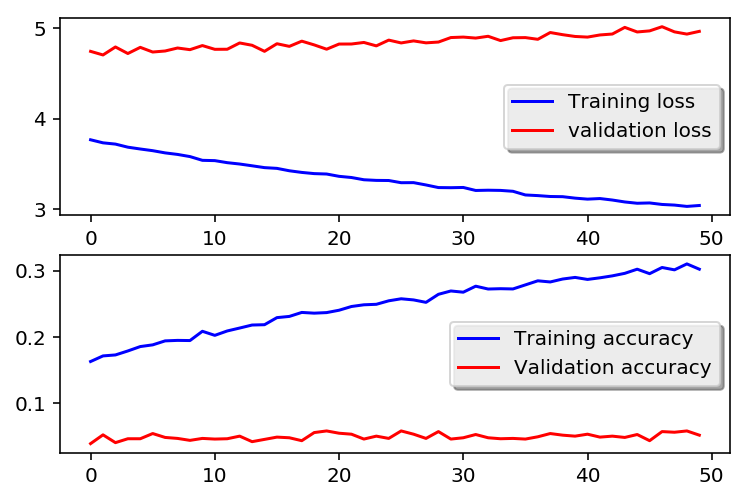

In [26]:
# Plot the loss and accuracy curves for training and validation on resnet model
fig, ax = plt.subplots(2,1)
ax[0].plot(new_resnet_history.history['loss'], color='b', label="Training loss")
ax[0].plot(new_resnet_history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(new_resnet_history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(new_resnet_history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

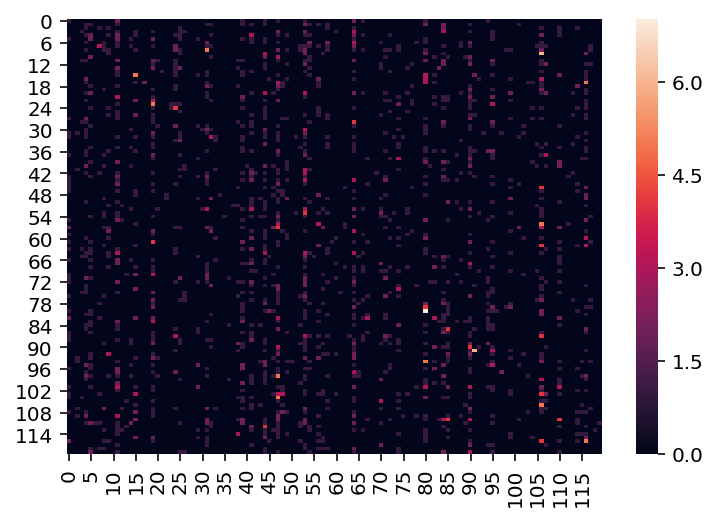

In [27]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred_new = Resnet_model_new.predict(X_valid_resnet_new)
# Convert predictions classes to one hot vectors 
Y_pred_classes_new = np.argmax(Y_pred_new,axis = 1) 
# Convert validation observations to one hot vectors
Y_true_new = np.argmax(y_valid_resnet_new,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true_new, Y_pred_classes_new) 
# plot the confusion matrix
ax = sns.heatmap(confusion_mtx)

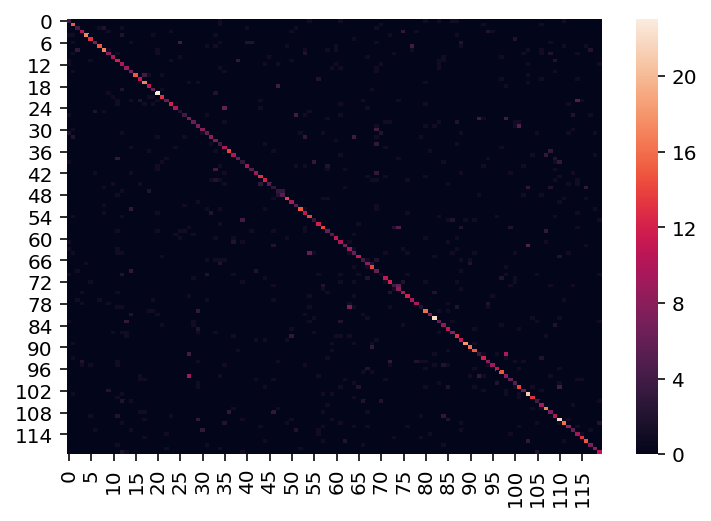

In [28]:
# Look at confusion matrix 
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = VGG_model_new.predict(X_valid_vgg_new)
# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_pred,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_valid_vgg_new,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
ax = sns.heatmap(confusion_mtx)

# Getting features on the test data-set for both ResNet50 and VGG19 architecture

In [29]:
resnet_features_test_new = get_features_new(ResNet50, X_test, keras.applications.resnet50.preprocess_input)
np.savez('new_features/new_resnet_features_test.npz' , X=resnet_features_test_new)

10357/10357 [==============================] - 274s 26ms/step


In [30]:
vgg_features_test_new = get_features_new(VGG19, X_test, keras.applications.vgg19.preprocess_input)
np.savez('new_features/new_vgg_features_test.npz' , X=vgg_features_test_new)


10357/10357 [==============================] - 528s 51ms/step


# Loading weights for Inception and Exception from the previous "saved_models" folder and loading new weights for ResNet and VGG19 model from "new_saved_models" folder to create Ensemble of all the models, two newly optimized and two older.

In [ ]:
# Loading old weights from 

Inception_model.load_weights('saved_models/inception.best.from_features.hdf5')
Xception_model.load_weights('saved_models/xception.best.from_features.hdf5')

In [42]:
# Loading weights from optimized architectures

Resnet_model_new.load_weights('new_saved_models/resnet.best.from_features.hdf5')
VGG_model_new.load_weights('new_saved_models/vgg.best.from_features.hdf5')



# Making predictions individually for all architectures including the two newly optimized architectures : ResNet50 and VGG19 

In [46]:
y_pred = Inception_model.predict(inception_features_test, batch_size=128)
for b in breed:
    df_test[b] = y_pred[:,class_to_num[b]]
inception_test = df_test.copy()
df_test.to_csv('prediction_inception.csv', index=None)

y_pred = Xception_model.predict(xception_features_test, batch_size=128)
for b in breed:
    df_test[b] = y_pred[:,class_to_num[b]]
xception_test = df_test.copy()
df_test.to_csv('prediction_xception.csv', index=None)

y_pred = Resnet_model_new.predict(resnet_features_test_new, batch_size=128)
for b in breed:
    df_test[b] = y_pred[:,class_to_num[b]]
resnet_test_new = df_test.copy()
df_test.to_csv('prediction_resnet_new.csv', index=None)

y_pred = VGG_model_new.predict(vgg_features_test_new, batch_size=128)
for b in breed:
    df_test[b] = y_pred[:,class_to_num[b]]
vgg_test_new = df_test.copy()
df_test.to_csv('prediction_vgg_new.csv', index=None)

# Ensemble by combining for all the architectures

In [47]:
n_model = 4
id_test = inception_test['id']
sum_test = inception_test.drop('id', axis=1) + xception_test.drop('id', axis=1) + resnet_test_new.drop('id', axis=1) + vgg_test_new.drop('id', axis=1)
ensemble_test = (np.exp(sum_test / n_model) - 1)
ensemble_test.insert(0, 'id', id_test)

ensemble_test.to_csv('prediction_stacked_new.csv', index=None)

# Result : 

## Upon submitting optimized prediction_stacked_new.csv, the public score improved(reduced) to : 0.84193

# -- Step 3 --

# As a last step I used only two architectures namely Inception and Xception and calculated the prediction_inception_xception.csv as the individual performances of both Inception and Xception architectures were good. 

In [ ]:
n_model = 2
id_test = inception_test['id']
sum_test = inception_test.drop('id', axis=1) + xception_test.drop('id', axis=1)
ensemble_test = (np.exp(sum_test / n_model) - 1)
ensemble_test.insert(0, 'id', id_test)

ensemble_test.to_csv('prediction_inception_xception.csv', index=None)

# Result of submitting "prediction_inception_xception.csv" : 

### Public Score improved(reduced) drastically to : 0.51866 
### The final rank for "amldm34" is 69.